_______________
<center>
  <h1 style="font-size: 40px; font-weight: bold">Dry Bean Prediction Project</h1>
</center>

______

__________
# **Name : Aswathy S**

# **Organization : Entri Elevate**

# **Date :** [Evaluation Date]
______

_________
# **1. Overview of Problem Statement:**
____________

* Dry beans are one of the most widely consumed legumes globally, with significant nutritional value and economic importance. Their seed quality is a key factor that directly impacts crop yield, disease resistance, and overall productivity, ultimately influencing revenue generation for farmers. Given that dry beans are the most popular pulse crop produced worldwide, ensuring their classification is essential for optimizing production processes, minimizing waste, and maintaining consistent quality.

* Accurate classification of dry bean seeds also plays a critical role in enhancing sustainable farming practices. By selecting high-quality seeds, farmers can reduce the need for chemical inputs, improve soil health, and promote environmentally friendly agricultural methods. Moreover, efficient seed classification enables better market access, as consumers and buyers seek high-quality produce, resulting in higher market value and greater economic returns. This practice contributes not only to increased profitability but also to food security and long-term agricultural sustainability.

________
# **2. Objective:**
______

* The primary challenge faced by dry bean producers and marketers is determining seed quality. Poor seed quality directly impacts the quality of the produce, leading to lower yields and higher susceptibility to diseases. Manual classification and sorting of bean seeds is a labor-intensive and difficult task.

* Our objective is to leverage machine learning techniques for the automatic classification of dry bean seeds, improving efficiency and accuracy in the process.This is a multi-class classification problem, where the goal is to classify a dry bean seed into one of seven classes:**Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, and Sira.**

___
# **3. Data Description:**
_________

## Source: 
* **Data Set Link** : https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

    * The dataset focuses on the classification of seven dry bean types (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira) using their physical and structural characteristics. It includes 13,611 high-resolution images of beans, with segmentation and feature extraction applied to isolate and analyze individual grains. A total of 16 features were derived, comprising 12 dimensional features (e.g., length, width, area) and 4 shape features (e.g., roundness, aspect ratio).

    * The dataset is designed for a multi-class classification task, leveraging computer vision and machine learning to automate the sorting and ensure uniform seed quality.


* **Dataset Additional Information:**

    * Seven distinct types of dry beans were considered in this research, focusing on features such as form, shape, type, and structure, all influenced by market demands. A computer vision system was designed to accurately classify these seven registered varieties of dry beans, which share similar characteristics, to achieve consistent and uniform seed classification.

    * For the classification model, a dataset comprising 13,611 images of grains from seven registered dry bean types was captured using a high-resolution camera. These images, processed by the computer vision system, underwent segmentation and feature extraction, resulting in a total of 16 features being derived from the grains. These features included 12 dimensions and 4 shape-related attributes.

    * This research aims to utilize these extracted features in developing a robust classification model to automate and improve the efficiency of dry bean seed sorting and quality assurance.

__________
## **Features :**
THERE ARE 16 FEATURES AND 1 TARGET VARIABLE.

**1)Area(A):** The area of a bean zone and the number of pixels within its boundaries.

**2) Perimeter (P):** Bean circumference is defined as the length of its border.

**3) Major axis length (L):** The distance between the ends of the longest line that can be drawn from a bean.

**4) Minor axis length (l):** The longest line that can be drawn from the bean while standing perpendicular to the main axis.

**5) Aspect ratio (K):** Defines the relationship between L and l.

**6) Eccentricity (Ec):** Eccentricity of the ellipse having the same moments as the region.

**7) Convex area (C):** Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

**8) Equivalent diameter (Ed):** The diameter of a circle having the same area as a bean seed area.

**9) Extent (Ex):** The ratio of the pixels in the bounding box to the bean area.

**10) Solidity (S):** Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

**11) Roundness (R):** Calculated with the following formula: (4piA)/(P^2)

**12) Compactness(CO):** Measures the roundness of an object: Ed/L

**13) ShapeFactor1 (SF1):** These factors combine geometric properties and moments to capture complex shape characteristics that basic features like                                area or perimeter may not fully distinguish.

**14) ShapeFactor2 (SF2)**

**15) ShapeFactor3 (SF3)**

**16) ShapeFactor4 (SF4)**
__________
#### **Target Variable:**
**17) Class:**  
* Seker
* Barbunya
* Bombay
* Cali
* Dermosan
* Horoz 
* Sira
________

________
# **4. Data Collection**
________

## * Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from scipy import stats
import pylab
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import joblib

## * Loading dataset

In [2]:
# Load the dataset.
df = pd.read_excel(r"C:\Users\admin\Downloads\dry+bean+dataset\DryBeanDataset\Dry_Bean_Dataset.xlsx")
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

In [3]:
df.shape

(13611, 17)

### Note:
* Shape of the data frame is (13611*17)
* rows =13611
* columns=17

In [4]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [5]:
df.tail()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON

In [6]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [8]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

___________
### **Insights from Summary Statistics:**

#### **1. General Observations:**

* The dataset contains 13,611 samples for each feature.
* The features capture geometric, dimensional, and shape-related properties of dry beans, which are essential for classification.
____________
#### **2. Key Feature Distributions:**

**a) Area:**

* Range: 20,420 to 254,616
* Mean: 53,048
* Indicates significant variation in bean sizes, with some beans being much larger than others.
  
**b) Perimeter:**

* Range: 524.74 to 1,985.37
* Mean: 855.28
* Reflects the external boundary length of the beans, which aligns with the area variations.

**c) MajorAxisLength & MinorAxisLength:**

* MajorAxisLength (largest dimension): Range: 183.60 to 738.86 (Mean: 320.14)
* MinorAxisLength (smallest dimension): Range: 122.51 to 460.20 (Mean: 202.27)
* The AspectRatio (MajorAxisLength / MinorAxisLength) has a mean of 1.58, showing that most beans are longer than they are wide.
  
**d) Eccentricity:**

* Range: 0.22 to 0.91 (Mean: 0.75)
* Indicates the degree of elongation. Higher values imply more elongated beans, while lower values are closer to circular.

**e) ConvexArea:**

* Range: 20,684 to 263,261 (Mean: 53,768)
* The convex hull area (enclosing the bean) is slightly higher than the actual area, with high solidity (mean = 0.99) confirming minimal irregularities.

**f) EquivDiameter:**

* Range: 161.24 to 569.37 (Mean: 253.06)
* Reflects the diameter of a circle with the same area as the bean.

**g) Extent:**

* Range: 0.56 to 0.87 (Mean: 0.75)
* Measures the ratio of the bean's area to its bounding box, showing the compactness of the shape.
______________

#### **3. Shape Features:**

**a) Roundness:**

* Range: 0.49 to 0.99 (Mean: 0.87)
* Indicates how circular the beans are, with most beans being closer to circular.

**b) Compactness:**

* Range: 0.64 to 0.99 (Mean: 0.80)
* Suggests beans are generally compact but vary in shape.

**c) Shape Factors (1 to 4):**

These advanced shape descriptors have small ranges, indicating subtle differences among bean types:
* ShapeFactor1: Mean = 0.0066 (Area to perimeter ratio)
* ShapeFactor2: Mean = 0.0017
* ShapeFactor3: Mean = 0.64
* ShapeFactor4: Mean = 0.99 (High values suggest well-defined shapes)
___________

#### **4. Spread of Features:**

* Most features have low standard deviations relative to their means, except for Area, Perimeter, and MajorAxisLength, indicating higher variability in bean size and shape.
_____

#### **5. Implications for Classification:**

* Area, Perimeter, MajorAxisLength, and MinorAxisLength are likely key features for distinguishing larger and smaller bean types.
* Eccentricity and Aspect Ratio can help separate elongated vs. round beans.
* Shape Factors may be crucial for capturing subtle differences in bean geometry.
* The high number of samples and detailed features provide a strong foundation for a machine learning model.
_________

________
# **5. Data Preprocessing - Data Cleaning**
_________

In [9]:
df['Class'].describe()

count        13611
unique           7
top       DERMASON
freq          3546
Name: Class, dtype: object

In [10]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [11]:
print("Missing values in each column:\n")
print(df.isnull().sum())

Missing values in each column:

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


* There are no missing values.

In [12]:
print("Duplicate values:")
print(df.duplicated().sum())

Duplicate values:
68


In [13]:
# there 68 duplicated rows in the dataset, we are dropping all those duplicated rows
df=df.drop_duplicates()
df.reset_index(drop=True)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13538  42097    759.696       288.721612       185.944705      1.552728   
13539  42101    757.499       281.576392       190.713136      1.476439   
13540  42139    759.321       281.539928       191.187979      1.472582   
13541  42147    763.779       283.382636       190.275731      1.489326   
13542  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13538      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13539      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13540      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13541      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13542      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13538     0.801865      0.006858      0.001749      0.642988      0.998385   
13539     0.822252      0.006688      0.001886      0.676099      0.998219   
13540     0.822730      0.006681      0.001888      0.676884      0.996767   
13541     0.817457      0.006724      0.001852      0.668237      0.995222   
13542     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13538  DERMASON  
13539  DERMASON  
13540  DERMASON  
13541  DERMASON  
13542  DERMASON  

[13543 rows x 17 columns]

* There were 68 duplicate rows in the dataset, which were removed to ensure data integrity and prevent potential bias in the model. The dataset is now free of duplicates, with the index reset to maintain consistency.


In [14]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13543.000000  13543.000000     13543.000000     13543.000000   
mean    53048.460385    854.993406       319.895602       202.365321   
std     29392.438324    214.722684        85.809260        45.051632   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36282.500000    703.230000       253.086806       175.886357   
50%     44580.000000    793.896000       296.404589       192.491117   
75%     61382.000000    977.146500       376.312489       217.245403   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13543.000000  13543.000000   13543.000000   13543.000000  13543.000000   
mean       1.581075      0.750315   53767.986709     253.034094      0.749829   
std        0.245245      0.091858   29844.248525      59.307709      0.048939   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.430662      0.715144   36673.000000     214.933277      0.718735   
50%        1.549860      0.763997   45122.000000     238.245711      0.759903   
75%        1.703916      0.809671   62360.000000     279.560351      0.786849   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13543.000000  13543.000000  13543.000000  13543.000000  13543.000000   
mean       0.987152      0.873671      0.800352      0.006561      0.001719   
std        0.004650      0.059393      0.061464      0.001130      0.000595   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985678      0.833410      0.763228      0.005893      0.001158   
50%        0.988288      0.883490      0.801514      0.006643      0.001700   
75%        0.990019      0.917031      0.834470      0.007270      0.002173   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13543.000000  13543.000000  
mean       0.644341      0.995078  
std        0.098653      0.004347  
min        0.410339      0.947687  
25%        0.582517      0.993720  
50%        0.642424      0.996393  
75%        0.696341      0.997891  
max        0.974767      0.999733

In [15]:
# Analyze class distribution
class_distribution = df['Class'].value_counts()
class_distribution

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

<Axes: xlabel='Class'>

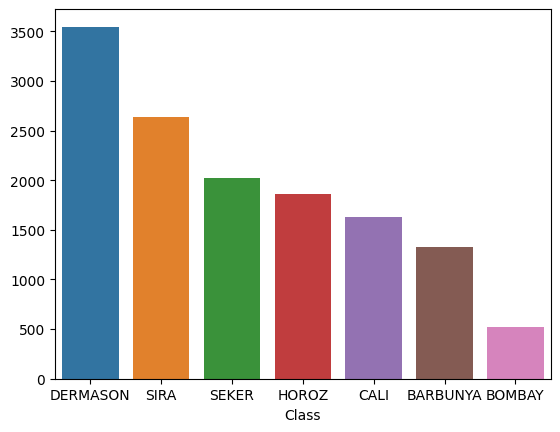

In [16]:
sns.barplot(x=class_distribution.index, y=class_distribution.values, hue=class_distribution.index, dodge=False, legend=False)

#### The class distribution of dry beans in the dataset is as follows:

* DERMASON has the highest count, followed by SIRA.
    
* SEKER and HOROZ have moderate representation.

* CALI also has a moderate count, though less than the previous classes.

* BARBUNYA is relatively underrepresented compared to SIRA and SEKER.

* BOMBAY has the lowest count in the dataset.

* This imbalance may result in the model being biased towards predicting the majority classes, while the minority classes, such as BOMBAY, might not be well-represented, potentially affecting model performance. Resampling techniques or class weighting can help address this issue.

In [17]:
numerical_features = df.select_dtypes(include='number').columns
print("Total Numerical Features:",numerical_features.shape)
print()
print("Numeric Features:",numerical_features)

Total Numerical Features: (16,)

Numeric Features: Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


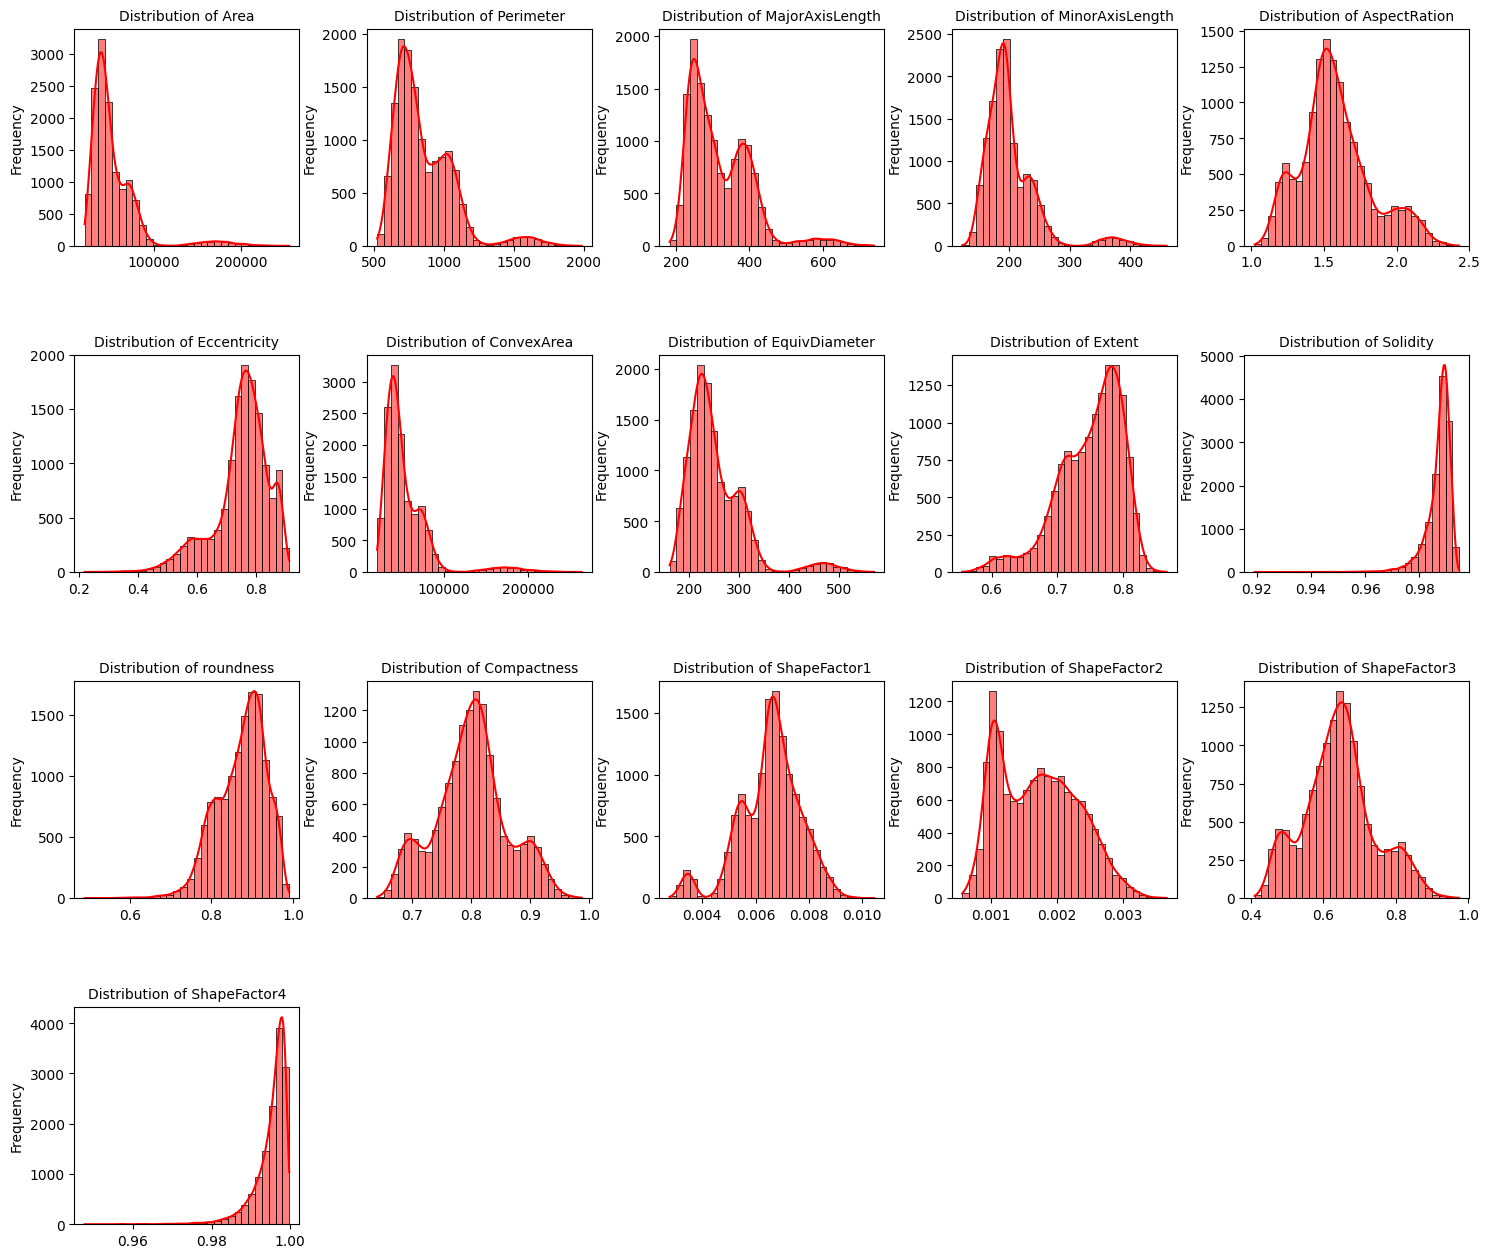

In [18]:
# numerical columns plotted
numerical_features = df.columns[:-1]  # Exclude 'target' if included in the DataFrame

plt.figure(figsize=(18, 24))  
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(6, 5, i)  
    sns.histplot(df[feature], bins=30, kde=True, color='red')
    plt.title(f"Distribution of {feature}", fontsize=10)
    plt.xlabel("")
    plt.ylabel("Frequency")

plt.subplots_adjust(hspace=0.5, wspace=0.3)  
plt.show()

* From the above graphs it is visible that all of the continous features in the dataset are skewed. So we need to handle the variables by applying necessary transformation techniques.

In [19]:
df.nunique()

Area               12011
Perimeter          13416
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13526
roundness          13543
Compactness        13543
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13543
Class                  7
dtype: int64

In [20]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [21]:
# Ensure diagnosis is in numerical_columns and remove it
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Check if 'diagnosis' is in the list, and remove it if present
if 'Class' in numerical_columns:
    numerical_columns.remove('Class')

# Display the resulting list to confirm
print("Numerical columns (excluding Class):")
print(numerical_columns)

Numerical columns (excluding Class):
['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']


### Pair plot

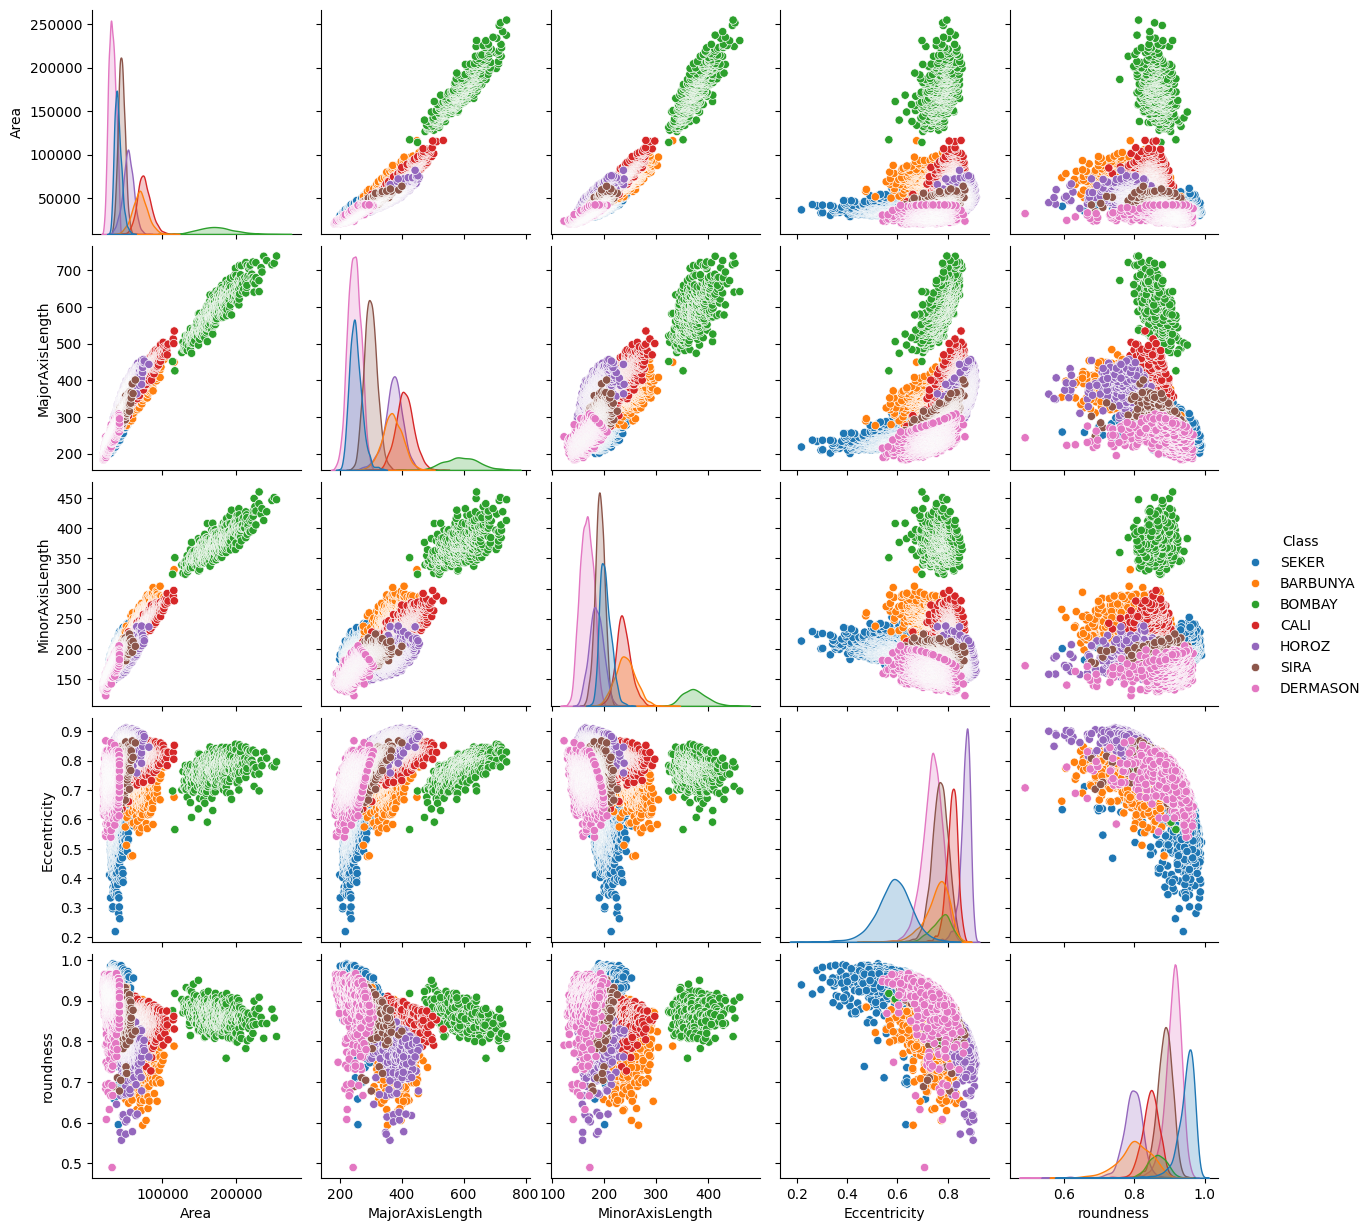

In [22]:
# Pair plot
sns.pairplot(
   df,
   vars=["Area", "MajorAxisLength", "MinorAxisLength", "Eccentricity", "roundness"],
   hue="Class",
);
plt.show()

______
### Insights

The pair plot for dry bean classification reveals several important insights:

* **1) Class Separability:**

    * **Distinct Clusters:**  Certain bean classes like BOMBAY are well-separated based on features such as Area, MajorAxisLength, and MinorAxisLength, while others (e.g., BARBUNYA, DERMASON, HOROZ) overlap, posing classification challenges.

    * **Best Features for Separation:**  Area and MajorAxisLength help clearly separate BOMBAY, while Eccentricity and Roundness are key for distinguishing SEKER and SIRA.


* **2) Feature Correlation:**

    * **High Correlation:**  Area, MajorAxisLength, and MinorAxisLength exhibit strong linear relationships, suggesting the possibility of removing one of these features or reducing redundancy with PCA.

    * **Negative Correlation:** Roundness and Eccentricity are inversely related, where roundness can help differentiate beans with similar Eccentricity.


* **3) Class Distribution in KDE:**

    * BOMBAY has distinctly larger Area and MajorAxisLength, making it easier to classify.

    * BARBUNYA, DERMASON, and HOROZ show overlapping distributions, indicating the need for additional features to improve classification accuracy.


* **4) Potential Challenges:**

    * **Class Overlap:** Some classes like DERMASON, HOROZ, and SEKER show significant overlap in Eccentricity and Roundness, which could lead to misclassifications. Feature engineering may help improve separability.

    * **Possible Outliers:** Scattered points, particularly in Area and Eccentricity, could be outliers. Outlier detection techniques might be useful for refining the dataset.
 
____________

### Outlier Detection & Handling

In [23]:
skewness = df[numerical_columns].skew().sort_values(ascending=True)
print("Skewness before outlier removal or transformation:")
print(skewness)

Skewness before outlier removal or transformation:
ShapeFactor4      -2.760125
Solidity          -2.546877
Eccentricity      -1.064932
Extent            -0.895655
roundness         -0.648725
ShapeFactor1      -0.530427
Compactness        0.036309
ShapeFactor3       0.242767
ShapeFactor2       0.294332
AspectRation       0.589045
MajorAxisLength    1.365813
Perimeter          1.628018
EquivDiameter      1.947303
MinorAxisLength    2.232013
ConvexArea         2.936102
Area               2.947136
dtype: float64


_____________
## Insights:

The skewness values after outlier removal or transformation indicate the following:

* Features such as ShapeFactor4, Solidity, and Eccentricity have strong negative skewness, suggesting that the majority of the data points are clustered at the higher end of the scale.
* Area, ConvexArea, and EquivDiameter show positive skewness, indicating that most values are concentrated at the lower end with a few large values pulling the distribution to the right.
* Features like MajorAxisLength and Perimeter have moderate positive skewness, suggesting a slight tendency towards higher values but are still relatively balanced.
* Compactness, ShapeFactor3, and ShapeFactor2 are closer to being normally distributed, with lower skewness values.
  
This distribution information can inform decisions for further transformations to improve model performance.
________________

#### Using IQR Method

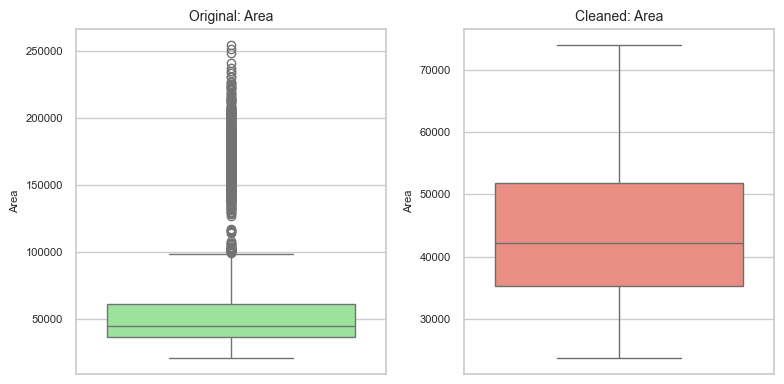

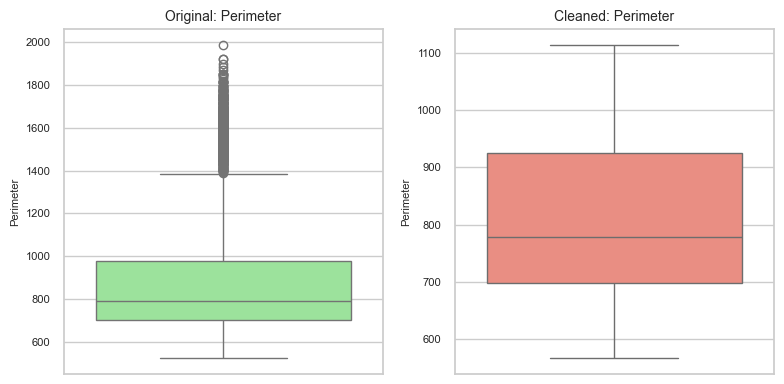

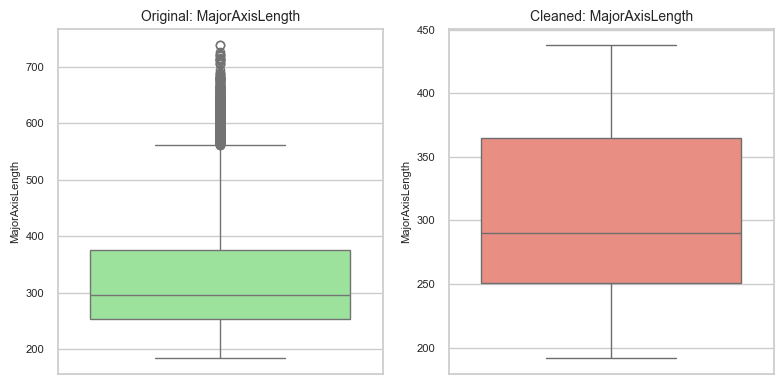

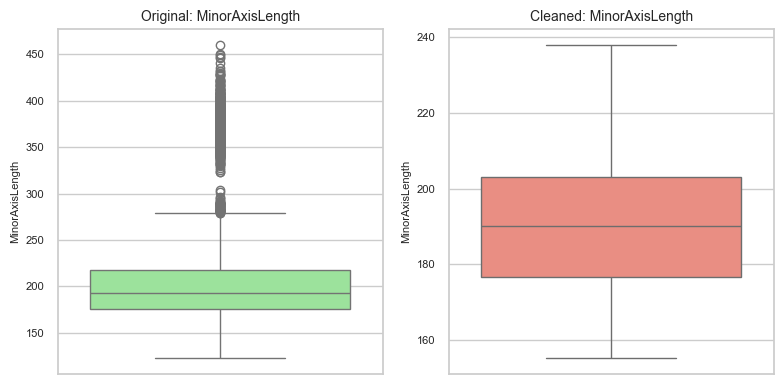

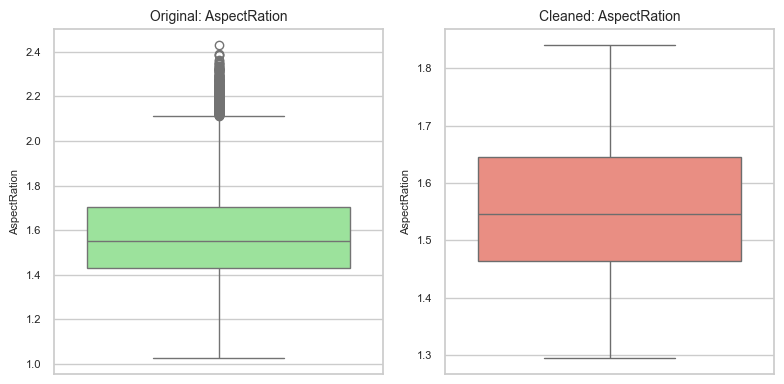

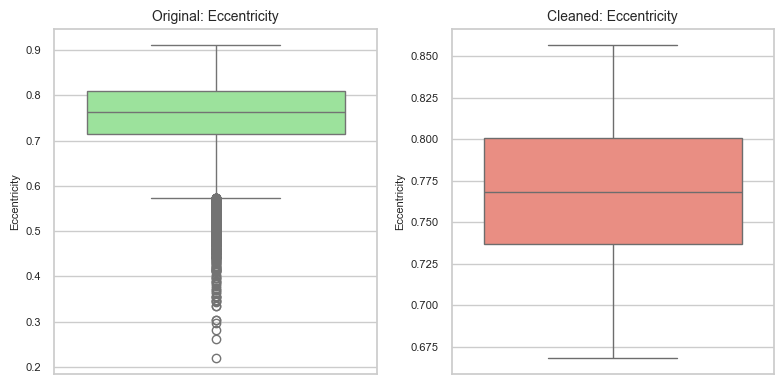

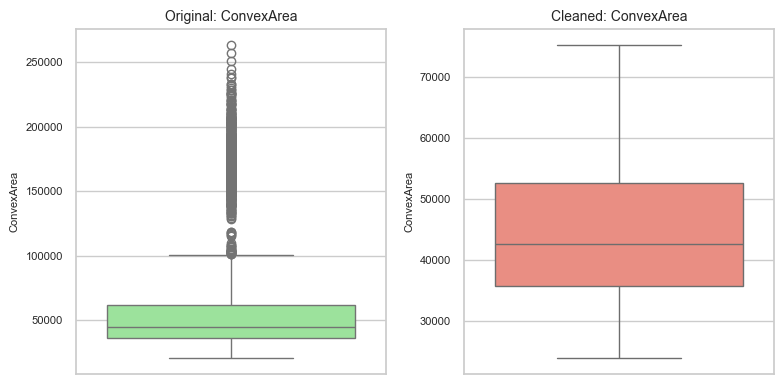

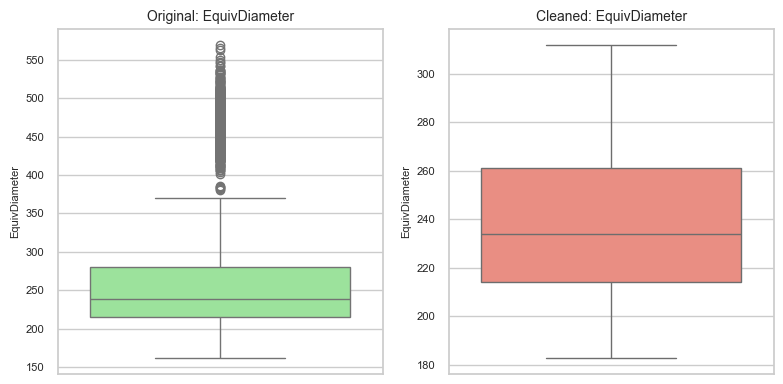

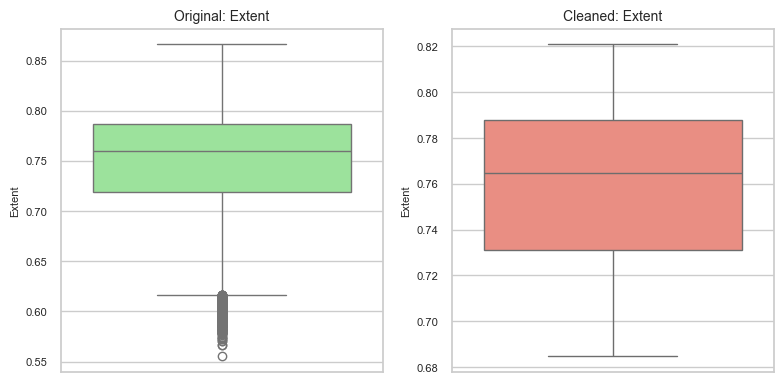

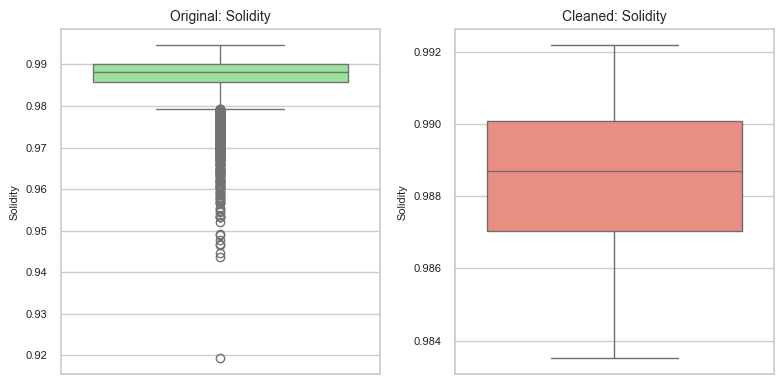

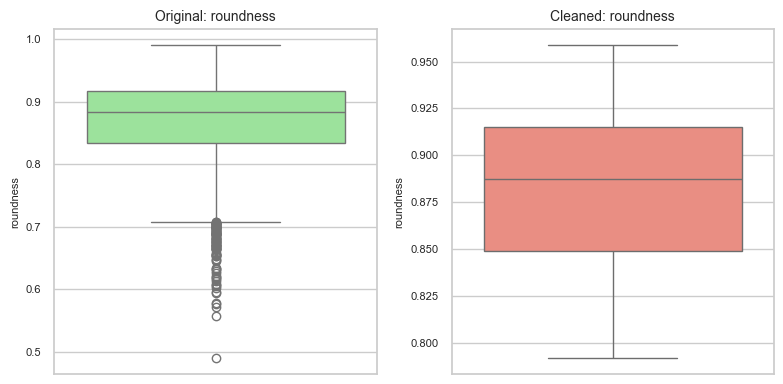

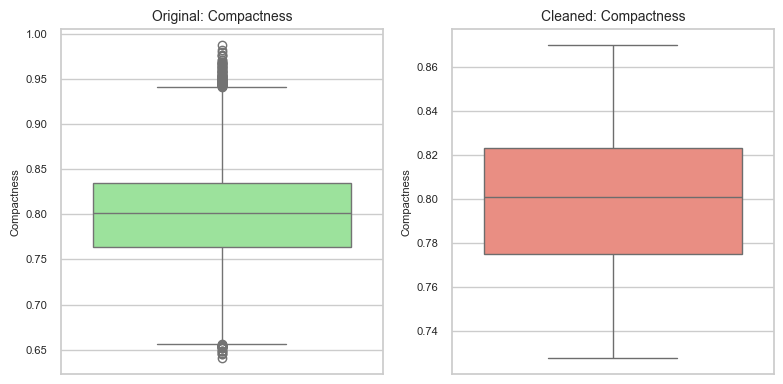

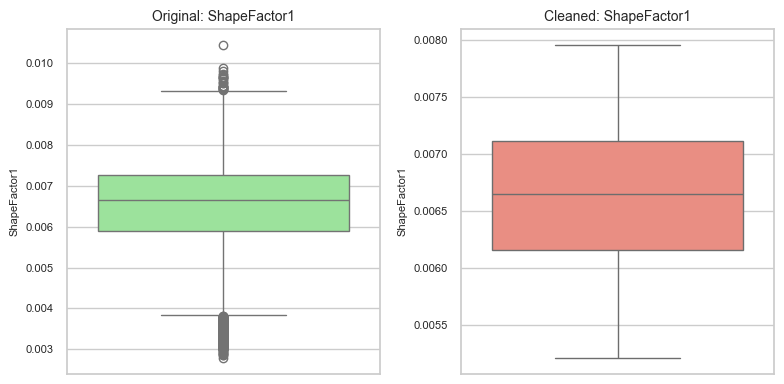

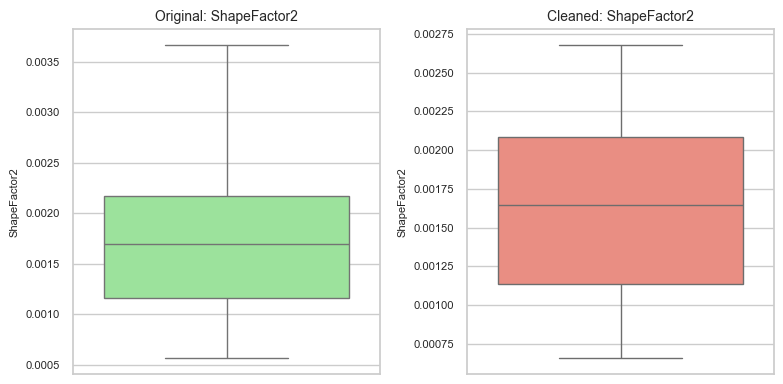

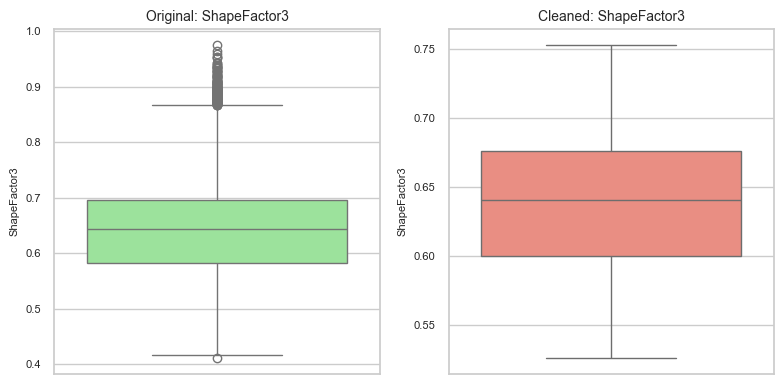

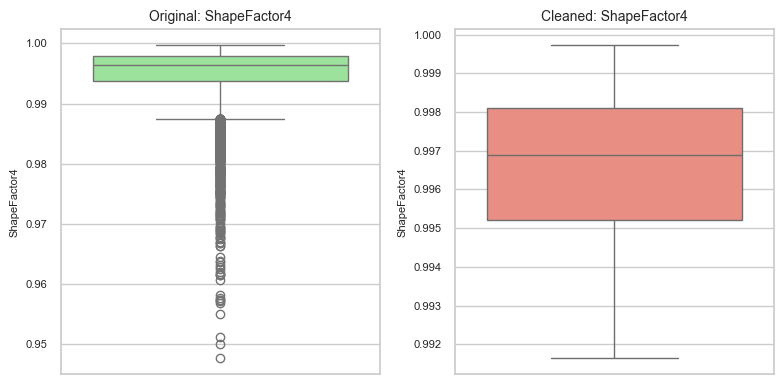

Dataset shape after being outliers removed: (11492, 17)
Dataset shape before being outliers removed: (13543, 17)


In [24]:
# Set style for Seaborn
sns.set(style="whitegrid")

# Define features for which you want to remove outliers
features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 
            'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

for feature in features:
    # Calculate Q1, Q3, and IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 0.5 * IQR
    upper = Q3 + 0.5 * IQR
    
    # Filter data to remove outliers for the current feature
    data_cleaned = df[(df[feature] >= lower) & (df[feature] <= upper)]

    # Create a box plot for the original data
    plt.figure(figsize=(8, 4))  # Smaller figure size
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[feature], color='lightgreen')
    plt.title(f'Original: {feature}', fontsize=10)  # Smaller title font
    plt.ylabel(feature, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Create a box plot for the cleaned data
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data_cleaned[feature], color='salmon')
    plt.title(f'Cleaned: {feature}', fontsize=10)  # Smaller title font
    plt.ylabel(feature, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Show plots
    plt.tight_layout()
    plt.show()

print("Dataset shape after being outliers removed:",data_cleaned.shape)
print("Dataset shape before being outliers removed:",df.shape)

* The IQR method was used to identify and remove outliers, reducing the dataset size from 13,543 rows to 11,492 rows, with 2,051 outliers removed. This process improved the dataset's quality by eliminating extreme values, ensuring a more reliable and representative dataset for analysis.

In [25]:
skewness = data_cleaned[numerical_columns].skew().sort_values(ascending=True)
print("Skewness after outlier removal or transformation:")
print(skewness)

Skewness after outlier removal or transformation:
Solidity          -1.780834
Eccentricity      -0.954571
Extent            -0.933063
roundness         -0.865757
ShapeFactor4      -0.617350
ShapeFactor1      -0.531292
Compactness       -0.116390
ShapeFactor3       0.105901
ShapeFactor2       0.126496
AspectRation       0.802943
MajorAxisLength    1.498036
Perimeter          1.761369
EquivDiameter      2.129433
MinorAxisLength    2.386864
ConvexArea         3.264138
Area               3.280600
dtype: float64


_________
**After outlier removal, several features exhibit skewness:**

* **Negative Skewness:** Features like Solidity (-1.78), Eccentricity (-0.95), and Extent (-0.93) have a left tail, indicating concentration of values on the higher end.

* **Positive Skewness:** Features such as Area (3.28), ConvexArea (3.26), and MinorAxisLength (2.39) show strong right tails, with values concentrated toward the lower end.

* **Near-Symmetric Features:** Features like Compactness (-0.12) and ShapeFactor3 (0.11) exhibit minimal skewness.
Size-related metrics tend to be positively skewed, while shape-related metrics are mostly negatively skewed. Transformations may be needed for features with extreme skewness to enhance model performance.

_________

In [26]:
# Highlight the features with high skewness (greater than 0.5 or less than -0.5)
highly_skewed = skewness[(skewness > 0.5) | (skewness < -0.5)]
print("\nHighly skewed features:")
print(highly_skewed)
print(len(highly_skewed))


Highly skewed features:
Solidity          -1.780834
Eccentricity      -0.954571
Extent            -0.933063
roundness         -0.865757
ShapeFactor4      -0.617350
ShapeFactor1      -0.531292
AspectRation       0.802943
MajorAxisLength    1.498036
Perimeter          1.761369
EquivDiameter      2.129433
MinorAxisLength    2.386864
ConvexArea         3.264138
Area               3.280600
dtype: float64
13


#### Using BoxCox Transformation

In [27]:
# Copy the cleaned DataFrame to preserve the original
df_transformed = data_cleaned.copy()

# List of features to transform
highly_skewed_features = [
    'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea',
    'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor4'
]

# Handle non-positive values and apply Box-Cox transformation
skewness_after_transformation = {}
for feature in highly_skewed_features:
    # Ensure all values are strictly positive
    if (df_transformed[feature] <= 0).any():
        df_transformed[feature] += abs(df_transformed[feature].min()) + 1
    
    # Apply Box-Cox transformation
    df_transformed[feature], _ = stats.boxcox(df_transformed[feature])
    
    # Compute skewness after transformation
    skewness_after_transformation[feature] = df_transformed[feature].skew()

# Display skewness values after transformation
for feature, skewness in skewness_after_transformation.items():
    print(f"Skewness of {feature} after Box-Cox transformation: {skewness:.4f}")

Skewness of Area after Box-Cox transformation: 0.0194
Skewness of Perimeter after Box-Cox transformation: 0.0000
Skewness of MajorAxisLength after Box-Cox transformation: 0.0943
Skewness of MinorAxisLength after Box-Cox transformation: -0.0226
Skewness of AspectRation after Box-Cox transformation: 0.0010
Skewness of Eccentricity after Box-Cox transformation: -0.0588
Skewness of ConvexArea after Box-Cox transformation: 0.0219
Skewness of EquivDiameter after Box-Cox transformation: 0.0194
Skewness of Extent after Box-Cox transformation: -0.1009
Skewness of Solidity after Box-Cox transformation: -0.0463
Skewness of roundness after Box-Cox transformation: -0.0933
Skewness of ShapeFactor1 after Box-Cox transformation: 0.0225
Skewness of ShapeFactor4 after Box-Cox transformation: -0.1145


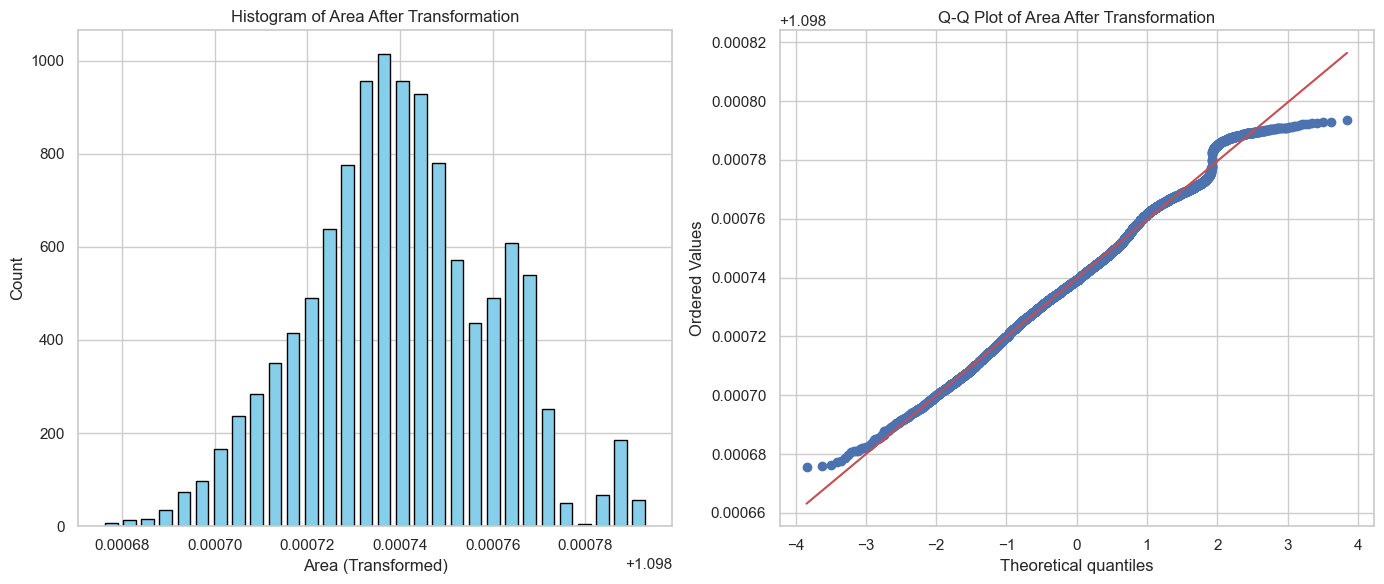

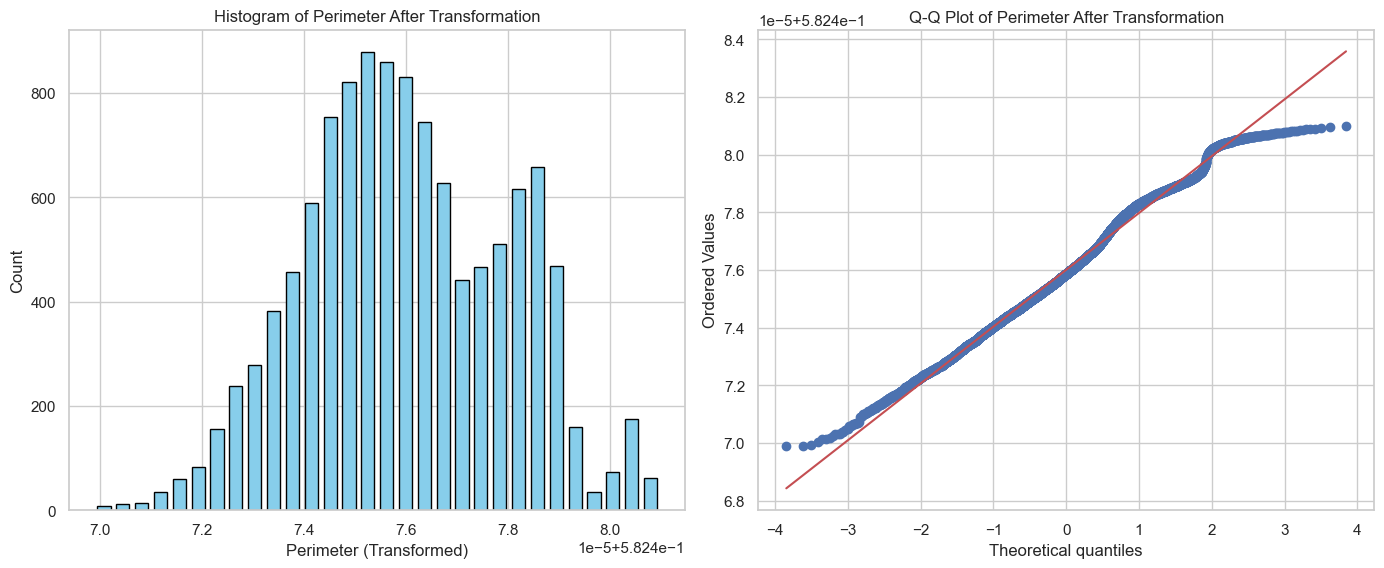

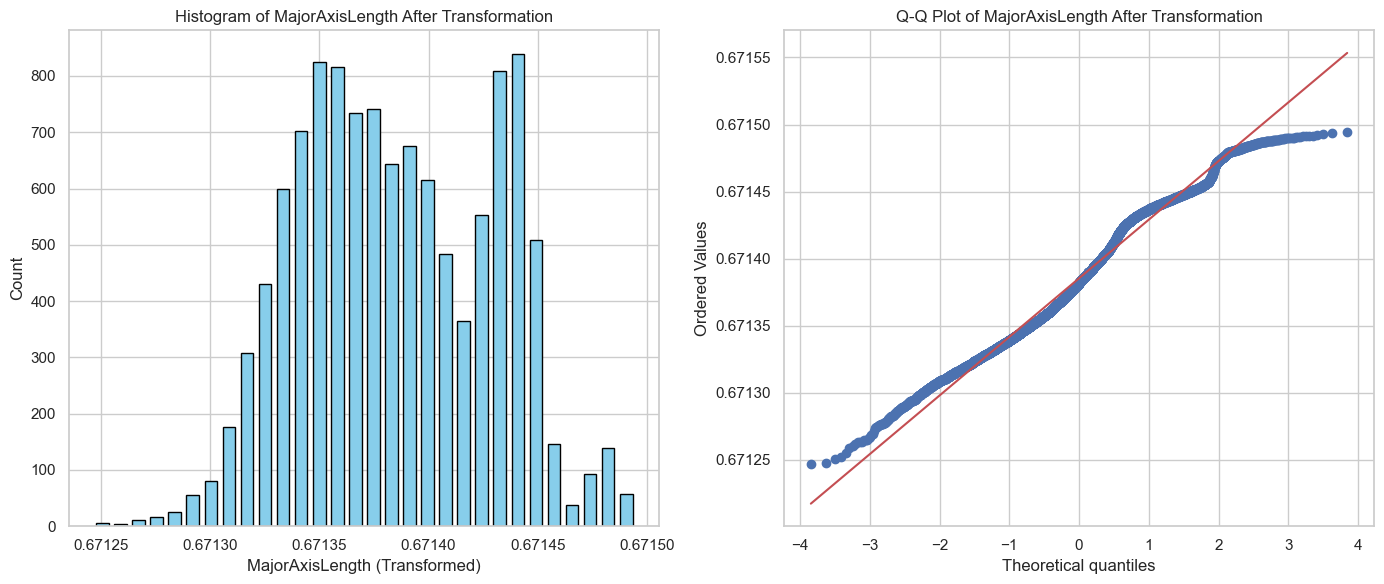

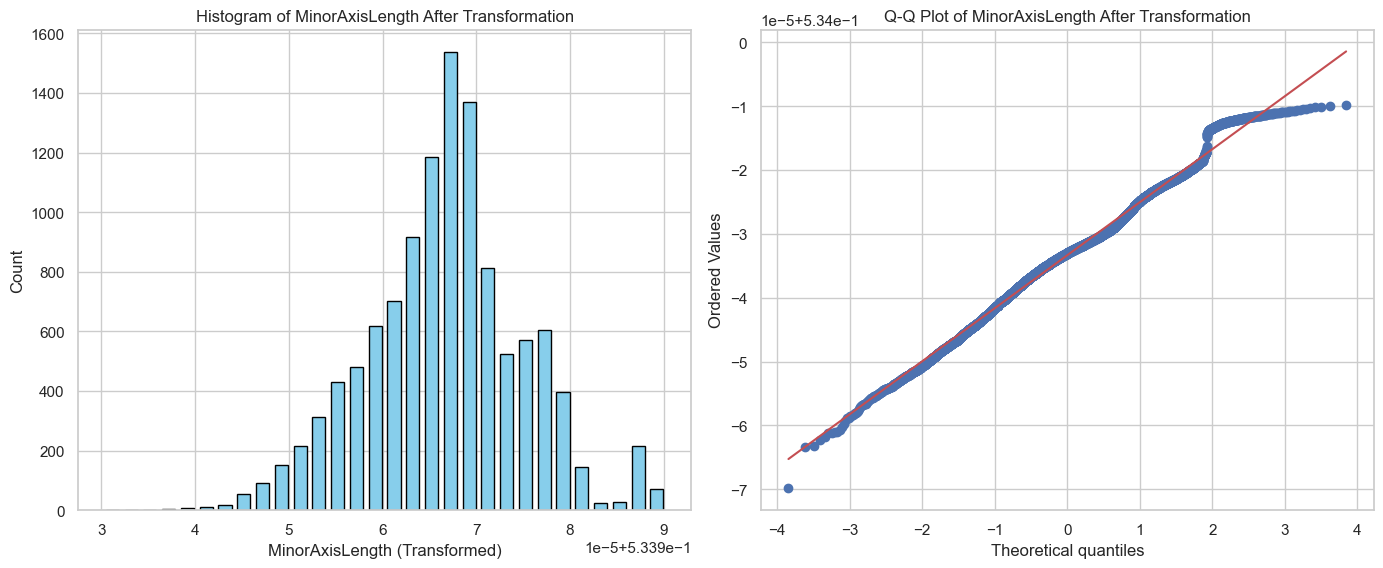

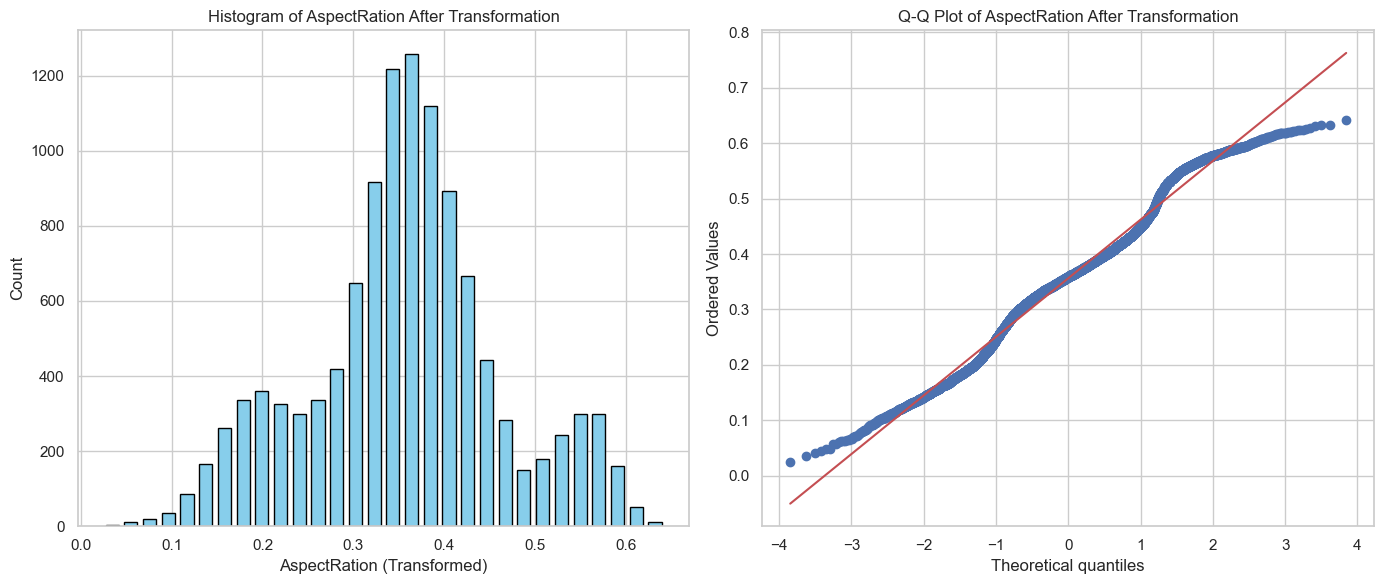

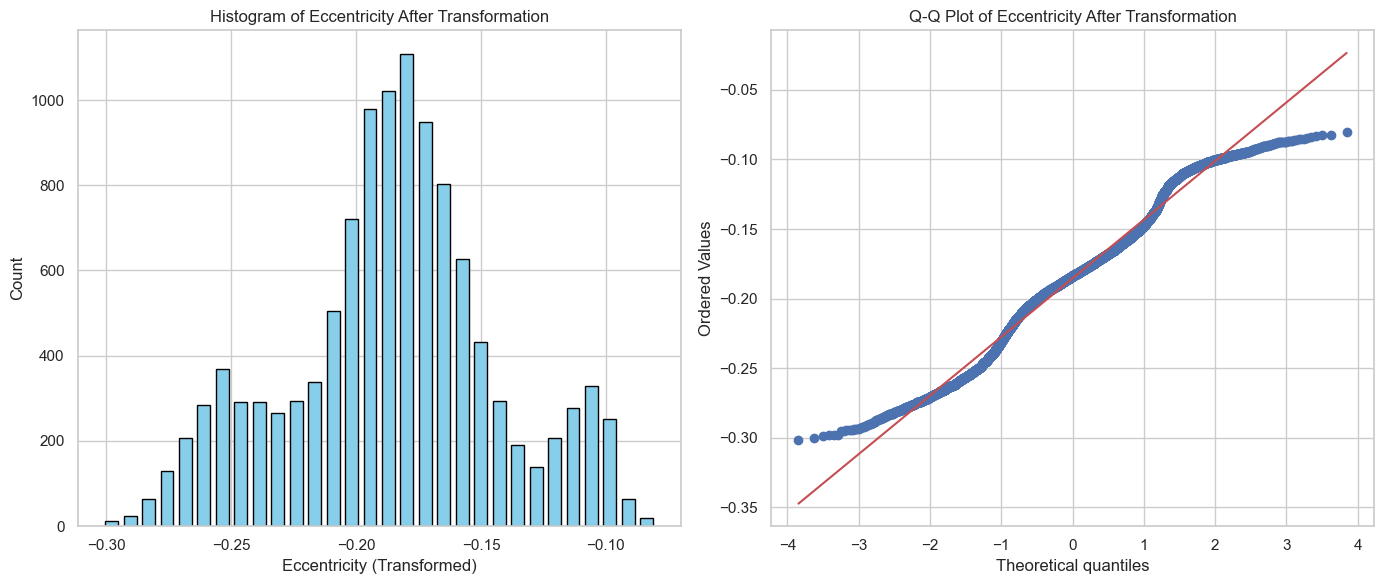

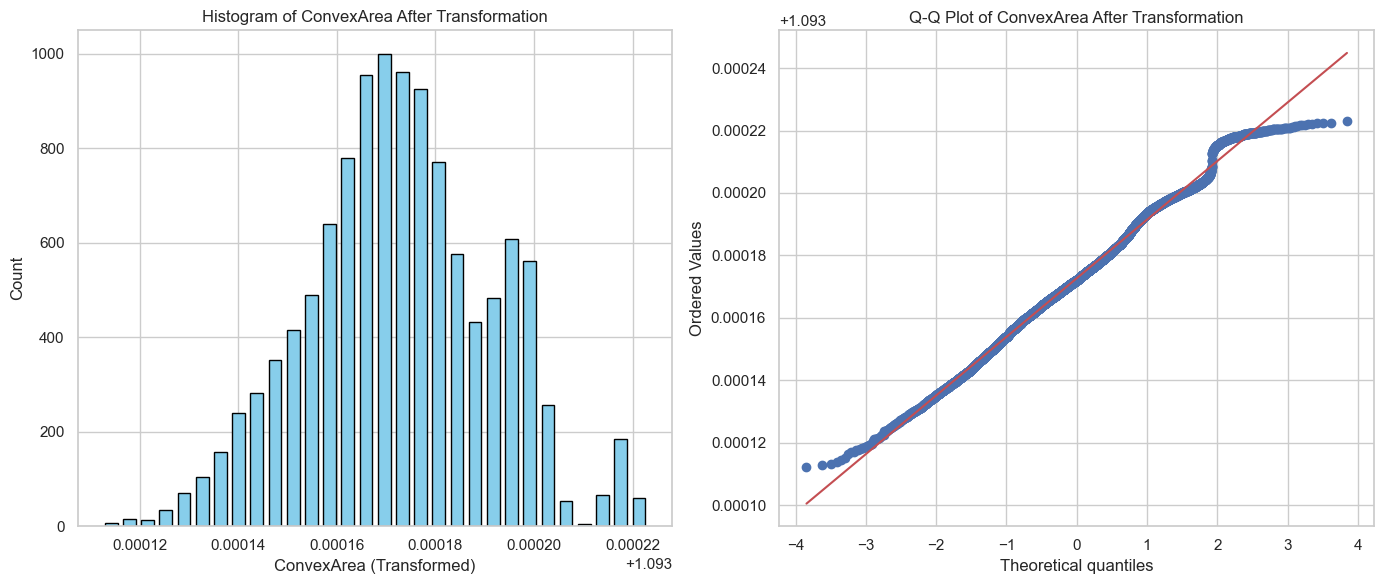

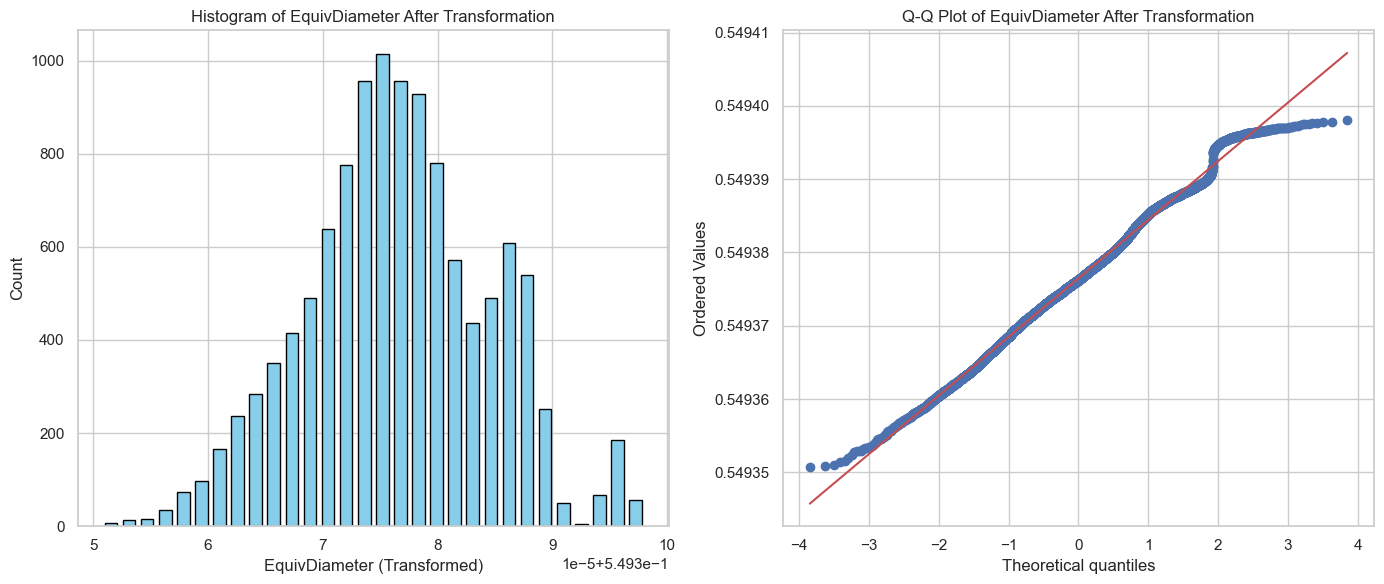

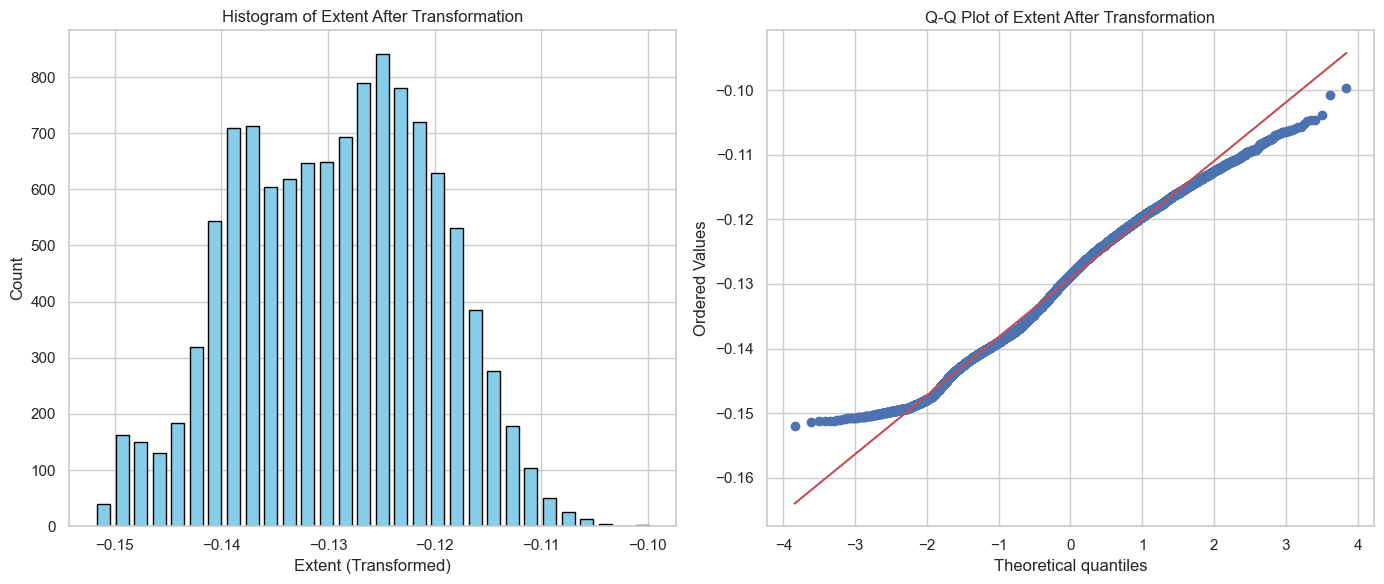

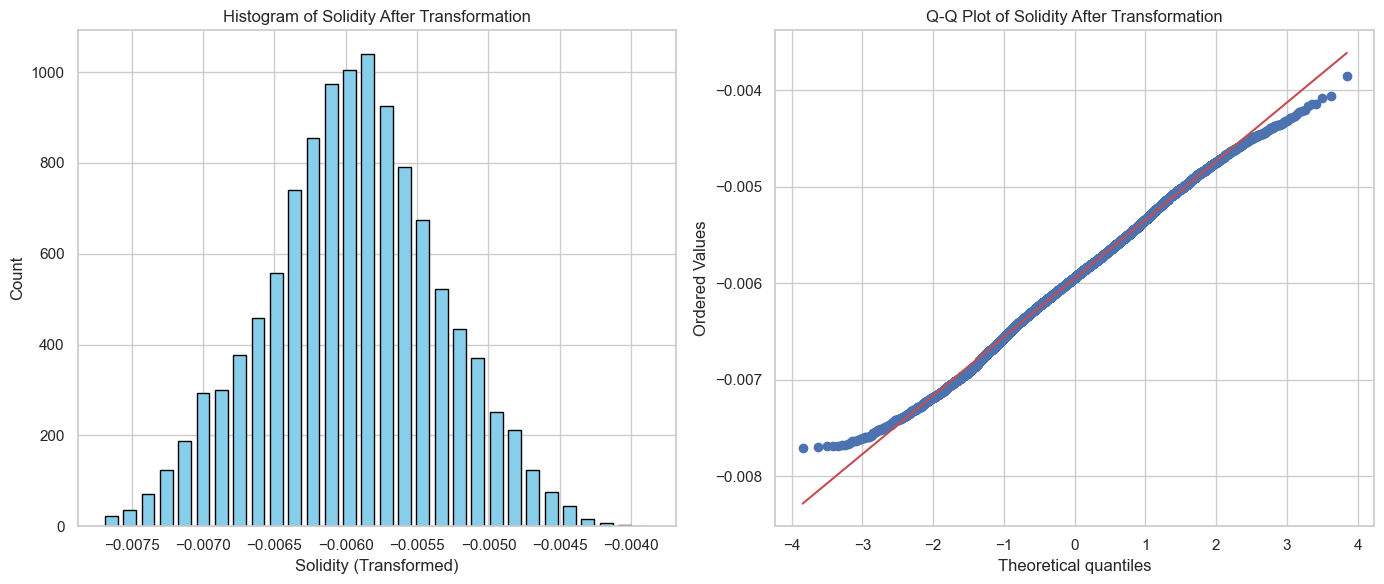

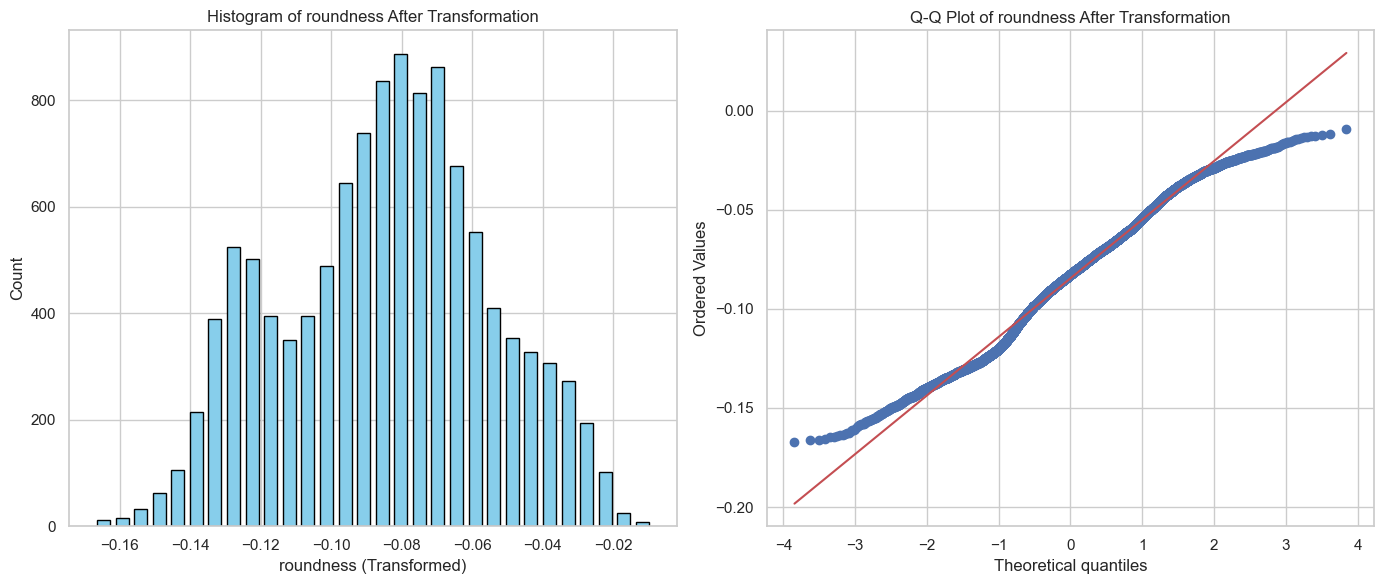

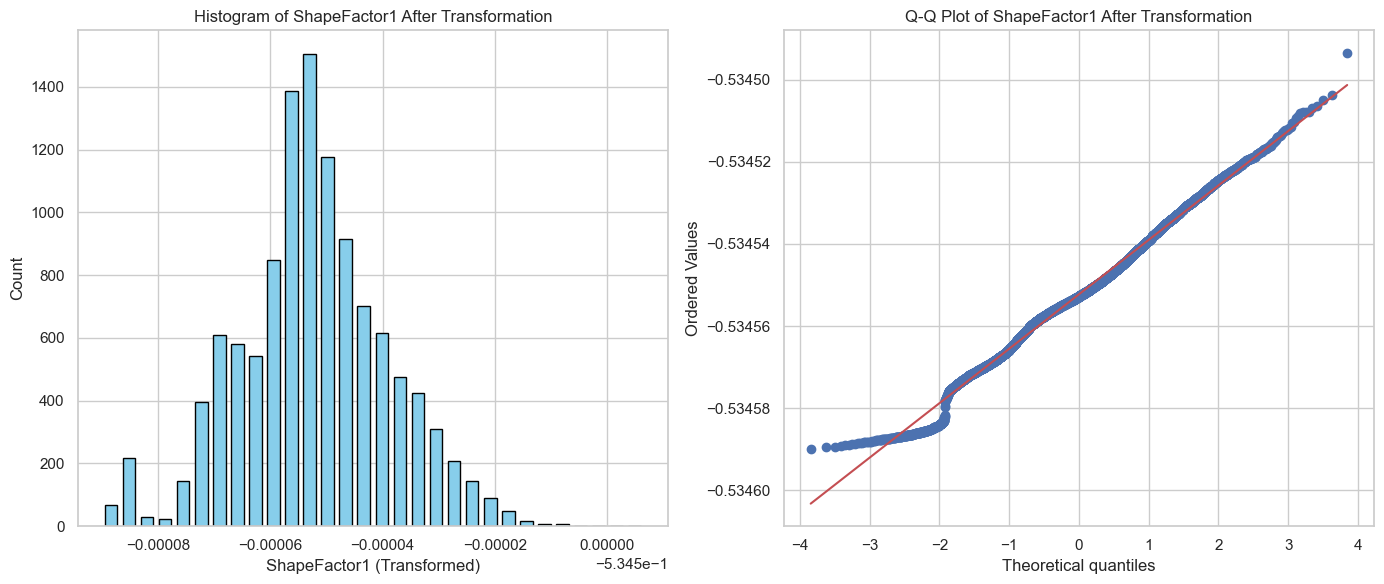

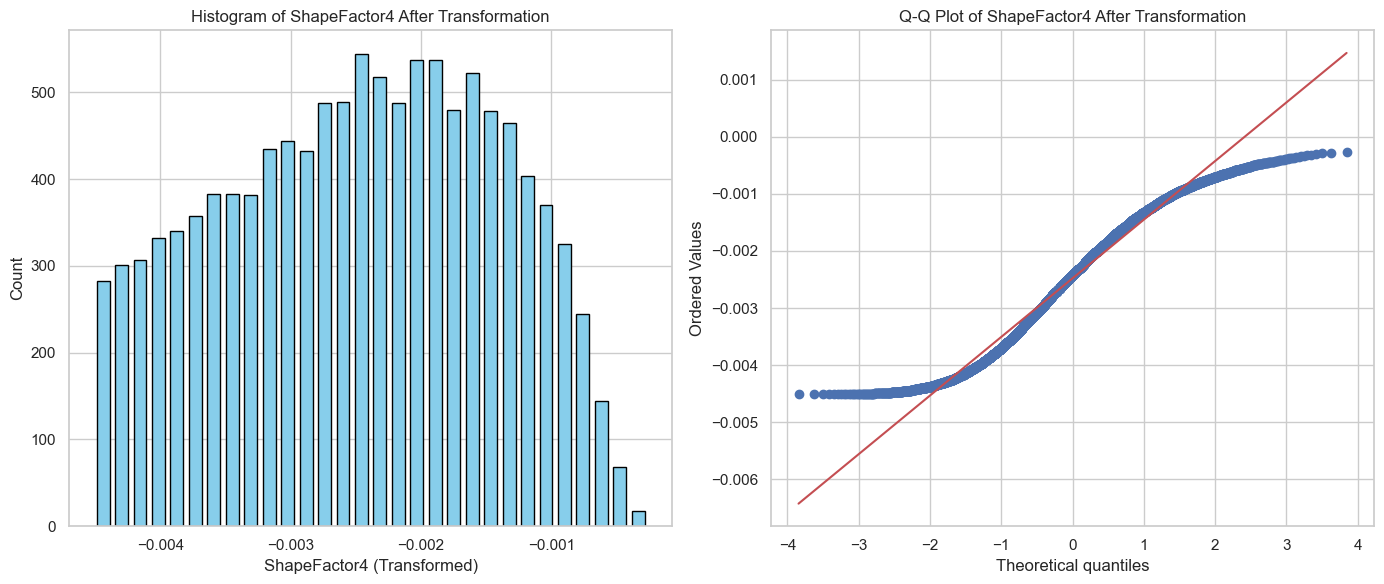

In [28]:
# Assuming data_cleaned contains the transformed data
highly_skewed_features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 
                          'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 
                          'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor4']

# Plot histograms and Q-Q plots
for feature in highly_skewed_features:
    # Create a figure
    plt.figure(figsize=(14, 6))
    
    # Histogram after transformation
    plt.subplot(1, 2, 1)
    plt.hist(df_transformed[feature], bins=30, rwidth=0.7, color='skyblue', edgecolor='black')
    plt.xlabel(f'{feature} (Transformed)')
    plt.ylabel('Count')
    plt.title(f"Histogram of {feature} After Transformation")
    
    # Q-Q plot after transformation
    plt.subplot(1, 2, 2)
    stats.probplot(df_transformed[feature], dist="norm", plot=pylab)
    plt.title(f"Q-Q Plot of {feature} After Transformation")
    
    # Show the plots
    plt.tight_layout()
    plt.show()

* Applied boxcox transformation for reducing the skewness and used probability plot to check the data normality. Here since most of the data points are aligned along straight line indicates that the data likely follows the normal distribution.

In [29]:
df_transformed.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  1.098710   0.582473         0.671295         0.533962      0.167982   
1  1.098711   0.582473         0.671282         0.533965      0.089636   
2  1.098713   0.582473         0.671303         0.533962      0.176995   
3  1.098714   0.582474         0.671299         0.533965      0.135285   
4  1.098715   0.582473         0.671284         0.533967      0.057691   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -0.261302    1.093144       0.549364 -0.127970 -0.005919  -0.037982   
1     -0.287305    1.093146       0.549365 -0.122984 -0.006641  -0.086502   
2     -0.257937    1.093147       0.549366 -0.124513 -0.005744  -0.046068   
3     -0.272957    1.093150       0.549366 -0.123325 -0.007369  -0.076522   
4     -0.295473    1.093149       0.549366 -0.125775 -0.005365  -0.014587   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358     -0.534545      0.003147      0.834222     -0.001150  SEKER  
1     0.953861     -0.534549      0.003564      0.909851     -0.001381  SEKER  
2     0.908774     -0.534546      0.003048      0.825871     -0.000865  SEKER  
3     0.928329     -0.534549      0.003215      0.861794     -0.003719  SEKER  
4     0.970516     -0.534553      0.003665      0.941900     -0.000779  SEKER

____________
# **6. Exploratory Data Analysis (EDA)**
____________

In [30]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11492 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             11492 non-null  float64
 1   Perimeter        11492 non-null  float64
 2   MajorAxisLength  11492 non-null  float64
 3   MinorAxisLength  11492 non-null  float64
 4   AspectRation     11492 non-null  float64
 5   Eccentricity     11492 non-null  float64
 6   ConvexArea       11492 non-null  float64
 7   EquivDiameter    11492 non-null  float64
 8   Extent           11492 non-null  float64
 9   Solidity         11492 non-null  float64
 10  roundness        11492 non-null  float64
 11  Compactness      11492 non-null  float64
 12  ShapeFactor1     11492 non-null  float64
 13  ShapeFactor2     11492 non-null  float64
 14  ShapeFactor3     11492 non-null  float64
 15  ShapeFactor4     11492 non-null  float64
 16  Class            11492 non-null  object 
dtypes: float64(16), o

In [31]:
# Calculate the correlation matrix
correlation = df_transformed[numerical_features].corr()

# Display the correlation matrix
print(correlation)

                     Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.989961         0.941852         0.896653   
Perimeter        0.989961   1.000000         0.967488         0.840887   
MajorAxisLength  0.941852   0.967488         1.000000         0.699208   
MinorAxisLength  0.896653   0.840887         0.699208         1.000000   
AspectRation     0.363751   0.455841         0.649655        -0.077381   
Eccentricity     0.365413   0.457374         0.651410        -0.074780   
ConvexArea       0.999956   0.990866         0.942631         0.895629   
EquivDiameter    1.000000   0.989961         0.941852         0.896653   
Extent          -0.013220  -0.058676        -0.107063         0.122566   
Solidity        -0.112290  -0.204938        -0.203377         0.010866   
roundness       -0.546938  -0.656027        -0.731117        -0.209147   
Compactness     -0.368679  -0.460790        -0.652561         0.072731   
ShapeFactor1    -0.893826  -0.837313  

### Heat map

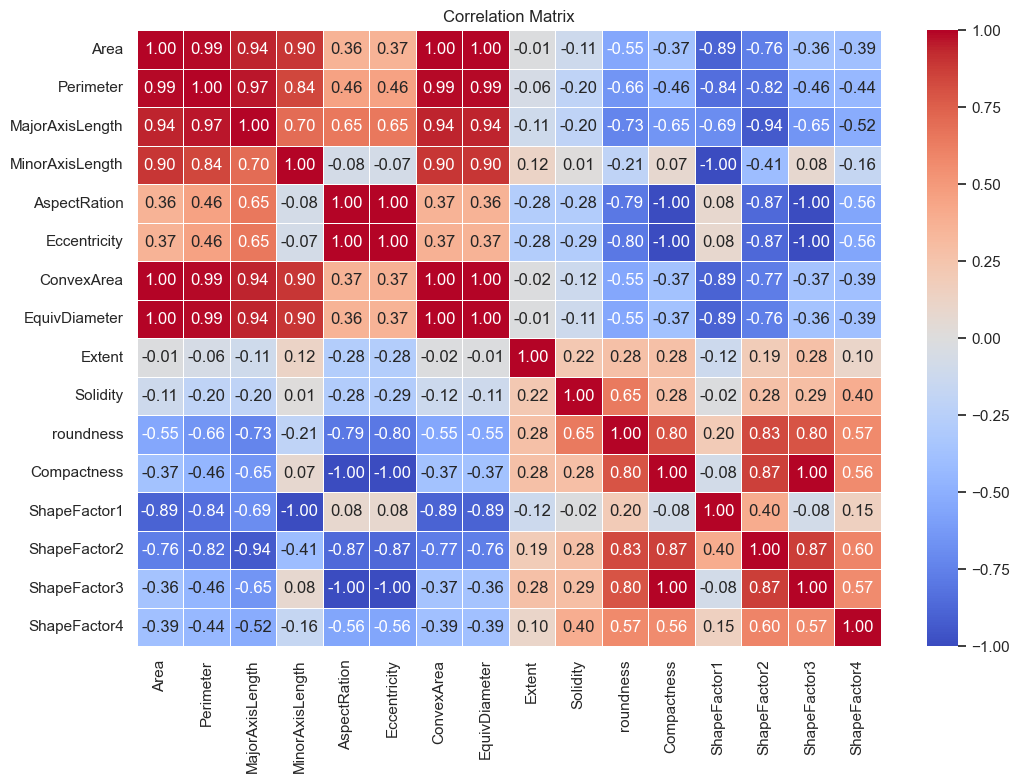

In [32]:
# Create a heatmap for better visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

________
## Insights:

**1)Strong Correlations:**

* Area and ConvexArea have a near-perfect correlation (0.999956), indicating that these features are almost identical in their values.
* MajorAxisLength and ConvexArea show a strong positive correlation (0.942631), suggesting that larger major axis lengths are associated with larger convex areas.
* EquivDiameter and Area also show a strong positive correlation (1.000000), implying that the equivalent diameter is closely tied to the area of the object.

**2)Negative Correlations:**

* ShapeFactor3 and Eccentricity have a very strong negative correlation (-0.999581), meaning that as the eccentricity increases, the value of ShapeFactor3 decreases significantly, and vice versa.
* MinorAxisLength and ShapeFactor1 show a very high negative correlation (-0.999922), indicating a strong inverse relationship between the minor axis length and ShapeFactor1.
* Compactness and Eccentricity also exhibit negative correlations (-0.998717), suggesting that more compact objects tend to have lower eccentricities.

**3)Feature Grouping:**

* Features like MajorAxisLength, ConvexArea, and EquivDiameter are highly correlated with each other, indicating they may represent similar characteristics of the objects being analyzed.
* Features like ShapeFactor3, ShapeFactor2, and Compactness are also tightly interrelated, suggesting they capture similar aspects of the shape of the objects.

**4) Potential Redundancy:**

* The near-perfect correlation between Area and EquivDiameter, as well as between ConvexArea and Area, suggests that these features may contain redundant information. Removing one of these features could potentially simplify the model without losing important information.

**Overall Conclusion:**
* The correlations suggest that certain features are highly related and may convey similar information, which could lead to multicollinearity issues in machine learning models. Some redundant features might be removed to improve model efficiency without losing predictive power. Further exploration and feature selection could help enhance model performance by focusing on the most informative and non-redundant features.
________

___________
# 7. **Feature Engineering**
_________

### * Encoding Categorical Features
Encoding refers to the process of converting categorical or textual data into numerical formats that can be processed by machine learning models. Most models cannot work directly with non-numerical data, so encoding is essential to transform these values into a format that preserves the information while making it usable in algorithms.

**Types of Encoding**

* Here are two common types of encoding techniques:

#### 1. Label Encoding

**Definition:** This technique assigns a unique numerical value (integer) to each category in a column. For example, if a column contains the categories ['Red', 'Green', 'Blue'], they might be encoded as [0, 1, 2].

**How It Works:**

* Each unique category is assigned a numeric label.
* The labels are ordinal, meaning they carry an implicit order (even if one doesn't exist in the original data).
 
**Use Case:** Label encoding is best suited for ordinal categorical features (e.g., 'Low', 'Medium', 'High'), where the order of values matters.

#### 2. One-Hot Encoding

**Definition:** One-hot encoding transforms categorical values into a series of binary vectors, where each category is represented as a unique vector with a single 1 and all other values as 0.

**How It Works:**

* For each category in the column, a new binary column is created.
* If a category is present in a row, its corresponding binary column is set to 1.
  
**Use Case:** One-hot encoding is ideal for nominal categorical features (e.g., 'Red', 'Green', 'Blue'), where the categories have no inherent order.
___________

In [33]:
categorical_features = df.select_dtypes(include='object').columns
print("Total Categorical Features:",categorical_features.shape)
print("Categorical Features:",categorical_features)

Total Categorical Features: (1,)
Categorical Features: Index(['Class'], dtype='object')


Total Categorical Features: 1
Categorical Features: Index(['Class'], dtype='object')


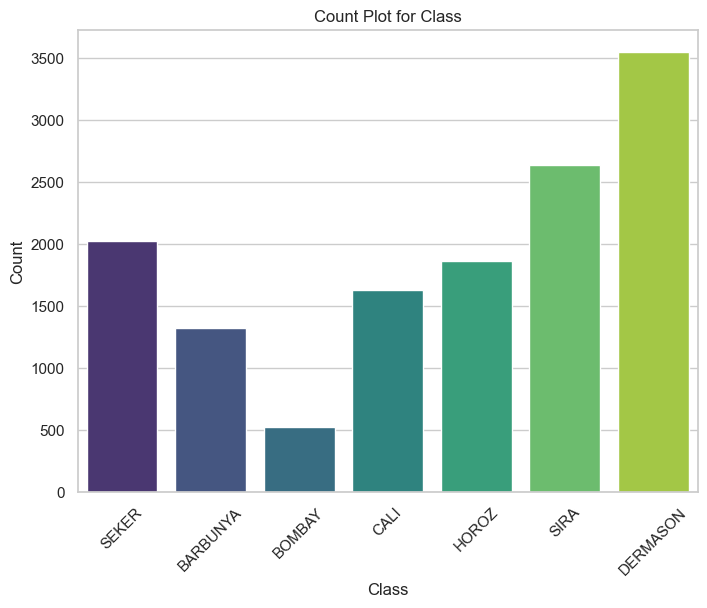

In [34]:
# Get categorical features
categorical_features = df.select_dtypes(include='object').columns

# Print the total number and names of categorical features
print("Total Categorical Features:", categorical_features.shape[0])
print("Categorical Features:", categorical_features)

# Create count plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df, palette="viridis")  
    plt.title(f'Count Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  
    plt.show()

In [35]:
df_transformed['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [36]:
df_transformed.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## Label Encoding

In [37]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'Class' column
df_transformed['Class'] = label_encoder.fit_transform(df_transformed['Class'])

# Store in data_encoded
data_encoded = df_transformed.copy()

______
#### Why Label Encoding?

* Turns categories into numbers: Each category in the Class column (like DERMASON, SIRA, etc.) is converted to a unique number (e.g., DERMASON → 0, SIRA → 1).

* No false order: Label Encoding doesn’t suggest any ranking or importance among the classes; it simply assigns numbers without implying order.

* Good for tree-based models: Label Encoding works well with models like Decision Trees or Random Forests because these models are not affected by the numbers assigned to categories.

* Avoids overfitting: We didn’t use One-Hot Encoding because it would create many extra columns (one for each category), which could lead to overfitting, especially with a high number of categories. Label Encoding keeps it simple by only adding one column.

* Keeps it simple: Label Encoding is a quick and easy way to convert categorical data into numbers, which many algorithms can use.

* No increase in data size: Unlike One-Hot Encoding, Label Encoding only adds one column, making it more memory-efficient.

________

In [38]:
data_encoded

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      1.098710   0.582473         0.671295         0.533962      0.167982   
1      1.098711   0.582473         0.671282         0.533965      0.089636   
2      1.098713   0.582473         0.671303         0.533962      0.176995   
3      1.098714   0.582474         0.671299         0.533965      0.135285   
4      1.098715   0.582473         0.671284         0.533967      0.057691   
...         ...        ...              ...              ...           ...   
13606  1.098739   0.582476         0.671387         0.533966      0.372797   
13607  1.098739   0.582476         0.671381         0.533967      0.336273   
13608  1.098739   0.582476         0.671381         0.533967      0.334337   
13609  1.098739   0.582476         0.671383         0.533967      0.342676   
13610  1.098739   0.582476         0.671391         0.533965      0.402389   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0         -0.261302    1.093144       0.549364 -0.127970 -0.005919  -0.037982   
1         -0.287305    1.093146       0.549365 -0.122984 -0.006641  -0.086502   
2         -0.257937    1.093147       0.549366 -0.124513 -0.005744  -0.046068   
3         -0.272957    1.093150       0.549366 -0.123325 -0.007369  -0.076522   
4         -0.295473    1.093149       0.549366 -0.125775 -0.005365  -0.014587   
...             ...         ...            ...       ...       ...        ...   
13606     -0.177976    1.093172       0.549376 -0.137576 -0.005533  -0.068436   
13607     -0.193143    1.093172       0.549376 -0.118482 -0.005408  -0.064814   
13608     -0.193951    1.093172       0.549376 -0.134952 -0.005654  -0.067229   
13609     -0.190473    1.093172       0.549376 -0.139005 -0.006151  -0.074045   
13610     -0.165855    1.093172       0.549376 -0.121629 -0.005721  -0.085740   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358     -0.534545      0.003147      0.834222     -0.001150   
1         0.953861     -0.534549      0.003564      0.909851     -0.001381   
2         0.908774     -0.534546      0.003048      0.825871     -0.000865   
3         0.928329     -0.534549      0.003215      0.861794     -0.003719   
4         0.970516     -0.534553      0.003665      0.941900     -0.000779   
...            ...           ...           ...           ...           ...   
13606     0.801865     -0.534551      0.001749      0.642988     -0.001416   
13607     0.822252     -0.534553      0.001886      0.676099     -0.001542   
13608     0.822730     -0.534553      0.001888      0.676884     -0.002500   
13609     0.817457     -0.534553      0.001852      0.668237     -0.003295   
13610     0.784997     -0.534549      0.001640      0.616221     -0.001570   

       Class  
0          5  
1          5  
2          5  
3          5  
4          5  
...      ...  
13606      3  
13607      3  
13608      3  
13609      3  
13610      3  

[11492 rows x 17 columns]

In [39]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11492 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             11492 non-null  float64
 1   Perimeter        11492 non-null  float64
 2   MajorAxisLength  11492 non-null  float64
 3   MinorAxisLength  11492 non-null  float64
 4   AspectRation     11492 non-null  float64
 5   Eccentricity     11492 non-null  float64
 6   ConvexArea       11492 non-null  float64
 7   EquivDiameter    11492 non-null  float64
 8   Extent           11492 non-null  float64
 9   Solidity         11492 non-null  float64
 10  roundness        11492 non-null  float64
 11  Compactness      11492 non-null  float64
 12  ShapeFactor1     11492 non-null  float64
 13  ShapeFactor2     11492 non-null  float64
 14  ShapeFactor3     11492 non-null  float64
 15  ShapeFactor4     11492 non-null  float64
 16  Class            11492 non-null  int32  
dtypes: float64(16), i

In [40]:
data_encoded['Class'] = df_transformed['Class'].values
data_encoded['Class'].value_counts()

Class
3    3473
6    2425
5    2023
4    1276
0    1238
2     744
1     313
Name: count, dtype: int64

#### Balancing target column

In [41]:
# Step 1: Separate features and target
X = data_encoded.drop(columns=['Class'], axis=1)
y = data_encoded['Class']

# Step 2: Choose resampling technique
use_smote = True  # Set to False to use SMOTEENN
if use_smote:
    resampler = SMOTE(random_state=42)
else:
    resampler = SMOTEENN(random_state=42)

# Step 3: Apply resampling
X_resampled, y_resampled = resampler.fit_resample(X, y)

# Step 4: Convert to DataFrame (optional)
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name='Class')

# Step 5: Combine features and target (optional)
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Step 6: Display class distribution
print("Original class distribution:\n", y.value_counts())
print("Resampled class distribution:\n", y_resampled_df.value_counts())

Original class distribution:
 Class
3    3473
6    2425
5    2023
4    1276
0    1238
2     744
1     313
Name: count, dtype: int64
Resampled class distribution:
 Class
5    3473
0    3473
1    3473
2    3473
4    3473
6    3473
3    3473
Name: count, dtype: int64


___________
* The output of the resampled class distribution was made by applying SMOTE (Synthetic Minority Over-sampling Technique).
  
Here is why:

* **SMOTE** works by generating synthetic samples for the minority classes to balance the class distribution.
* When **SMOTE** is applied, it doesn't just duplicate the minority class samples; it creates new, synthetic samples by interpolating between existing minority class samples, making the class distribution more balanced.
* In the resampled distribution, all classes are now equal in size (3473 samples each). This is the typical result of SMOTE, which ensures the minority classes are increased to the same size as the largest class, in this case, the number of DERMASON samples.

* If **SMOTEENN** was used, the class distribution would still be more balanced but could include some classes being slightly less than others due to the "noise removal" part of ENN. However, in this case, since all classes are exactly equal, it clearly indicates the use of SMOTE.
__________

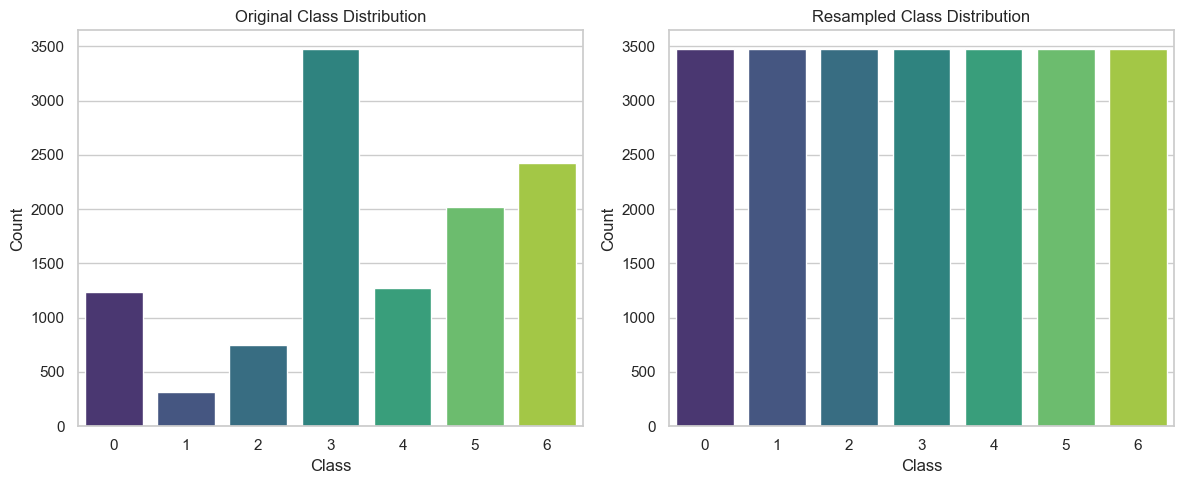

In [42]:
# Plot original vs resampled class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original class distribution
sns.barplot(x=y.value_counts().index, y=y.value_counts().values, palette="viridis", ax=axes[0])
axes[0].set_title("Original Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

# Resampled class distribution
sns.barplot(x=y_resampled_df.value_counts().index, y=y_resampled_df.value_counts().values, palette="viridis", ax=axes[1])
axes[1].set_title("Resampled Class Distribution")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [43]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24311 entries, 0 to 24310
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             24311 non-null  float64
 1   Perimeter        24311 non-null  float64
 2   MajorAxisLength  24311 non-null  float64
 3   MinorAxisLength  24311 non-null  float64
 4   AspectRation     24311 non-null  float64
 5   Eccentricity     24311 non-null  float64
 6   ConvexArea       24311 non-null  float64
 7   EquivDiameter    24311 non-null  float64
 8   Extent           24311 non-null  float64
 9   Solidity         24311 non-null  float64
 10  roundness        24311 non-null  float64
 11  Compactness      24311 non-null  float64
 12  ShapeFactor1     24311 non-null  float64
 13  ShapeFactor2     24311 non-null  float64
 14  ShapeFactor3     24311 non-null  float64
 15  ShapeFactor4     24311 non-null  float64
 16  Class            24311 non-null  int32  
dtypes: float64(1

_______
# 8. **Feature Selection**
____

###  Random Forest

**Random Forest** is a powerful method for selecting the most important features in a dataset. Random Forest is an ensemble learning algorithm that can be used for both classification and regression. One of the advantages of Random Forest is that it can help determine the importance of each feature in predicting the target variable.

Feature selection using Random Forest is widely used for the following reasons:

* **Identifies Important Features:** Helps determine the most relevant features for predictions.
* **Improves Model Performance:** By focusing on key features, it enhances accuracy and reduces overfitting.
* **Simplifies Models:** Eliminates irrelevant features, making models faster and easier to interpret.
* **Handles Mixed Data Types:** Works well with both categorical and continuous data.
* **Captures Non-Linear Relationships:** Effectively handles complex relationships in the data.
* **Manages High-Dimensional Datasets:** Suitable for datasets with many features.
* **Robust to Noise and Outliers:** Less sensitive to noise, resulting in more stable models.
* **Automatic Feature Importance:** Provides transparency by ranking features based on their importance.
* **Improves Efficiency:** Reduces computational costs and boosts predictive accuracy.
_____________

In [44]:
# Assume X is your feature set and y is your target variable
x = df_resampled.drop('Class', axis=1)  # Features excluding the target
y = df_resampled['Class']  # Target column
# Create a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

            Feature  Importance
2   MajorAxisLength    0.112652
14     ShapeFactor3    0.109044
11      Compactness    0.095959
10        roundness    0.080940
12     ShapeFactor1    0.078652
13     ShapeFactor2    0.074969
5      Eccentricity    0.072918
0              Area    0.070084
6        ConvexArea    0.059129
3   MinorAxisLength    0.056643
4      AspectRation    0.056618
9          Solidity    0.049846
7     EquivDiameter    0.038565
15     ShapeFactor4    0.028072
8            Extent    0.012234
1         Perimeter    0.003674


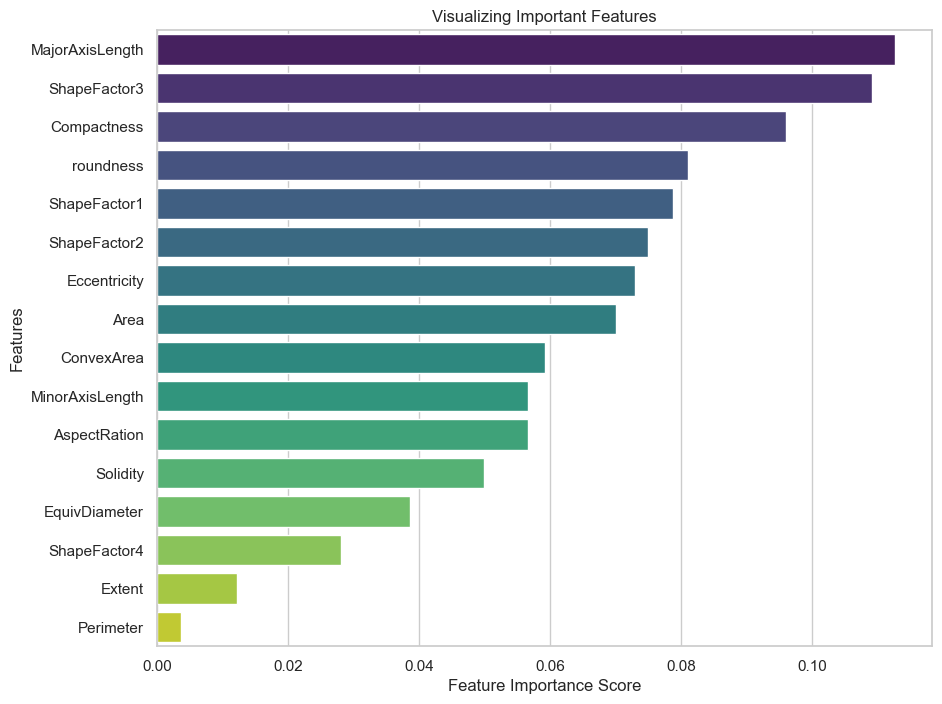

In [45]:
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create the plot with sorted feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance_df, palette='viridis')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

______
* In Random Forest, setting a threshold helps adjust decision boundaries, optimizing model performance by balancing precision, recall, and handling class imbalances based on specific goals.

_____________

In [46]:
# Set a threshold 
threshold = 0.03

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

print("Selected Features:")
print(selected_features)

# If you want to use the selected features for your dataset X
X_selected = x[selected_features['Feature']]

Selected Features:
            Feature  Importance
2   MajorAxisLength    0.112652
14     ShapeFactor3    0.109044
11      Compactness    0.095959
10        roundness    0.080940
12     ShapeFactor1    0.078652
13     ShapeFactor2    0.074969
5      Eccentricity    0.072918
0              Area    0.070084
6        ConvexArea    0.059129
3   MinorAxisLength    0.056643
4      AspectRation    0.056618
9          Solidity    0.049846
7     EquivDiameter    0.038565


_______
# 9. **Split Data into Training and Testing Sets:**
_______

In [47]:
from sklearn.model_selection import train_test_split

X =df_resampled.drop(columns=['Class'], axis=1) # Exclude target column
y =df_resampled['Class']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")  

Training set features shape: (19448, 13)
Testing set features shape: (4863, 13)
Training set target shape: (19448,)
Testing set target shape: (4863,)


_____
# 10. **Feature Scaling:**
____

## Standardization
* Standardization allows the model to learn better by equalizing feature ranges, avoiding biases.StandardScaler transforms features by removing the mean and scaling to unit variance (i.e., it standardizes the data).
* The transformed data has a mean of 0 and a standard deviation of 1.
* It preserves outlier influence (i.e., outliers are not removed but remain significant in the transformed data).
* Works well when data follows a Gaussian (normal) distribution.

In [48]:
# Select numerical features
numerical_features = X_selected.select_dtypes(include=['float64', 'int64']).columns

#Standardization
standard_scaler = StandardScaler()
x_train_scaled = standard_scaler.fit_transform(X_train)
x_test_scaled = standard_scaler.fit_transform(X_test)

_______
# 11. **Build the ML Model:**
_______

## Classification: 

* SVM
* Decision Tree
* Naive Bayes
* Random Forest
* K-Nearest Neighbors
* Gradient Boost.
  
**1) SVM (Support Vector Machine):**

* **Explanation:**  SVM is a powerful classification method that finds the hyperplane that best separates the data into different classes. It works well for both linear and non-linear data by using kernel functions.
* **Why Used for Dry Bean Dataset:** SVM can effectively classify the dry bean seeds because it can handle complex decision boundaries and high-dimensional feature spaces, making it suitable for distinguishing between different classes of dry beans based on features like shape, size, and texture.
  
**2) Decision Tree:**

* **Explanation:**  A decision tree is a tree-like structure where each internal node represents a decision based on a feature, and each leaf node represents a class label.
* **Why Used for Dry Bean Dataset:**  Decision trees are useful for classifying dry beans as they are interpretable, making it easy to visualize how different features (like area, perimeter, and aspect ratio) contribute to the classification. They also handle both categorical and continuous data well.

**3) Gaussian Naive Bayes:**

* **Explanation:** Gaussian Naive Bayes is a variant of the Naive Bayes classifier that assumes the features follow a Gaussian (normal) distribution within each class. It applies Bayes' theorem while modeling the likelihood of each feature as a Gaussian distribution.

* **Why Used for Dry Bean Dataset:** Gaussian Naive Bayes is suitable for the dry bean classification task if the features (such as size or shape measurements) are approximately normally distributed. It is computationally efficient, handles both categorical and continuous data, and performs well when the features exhibit a normal distribution within each class, making it effective for this dataset.

**4)Random Forest:**

* **Explanation:** Random Forest is an ensemble learning method that uses multiple decision trees to classify data. Each tree is trained on a random subset of the data, and the final prediction is made by averaging the outputs of all the trees.
* **Why Used for Dry Bean Dataset:** Random Forest is well-suited for the dry bean classification problem because it reduces the risk of overfitting compared to individual decision trees. It can handle a large number of features and is robust to noise, making it effective for datasets with complex patterns, such as the dry bean seed features.

**5)K-Nearest Neighbors (K-NN):**

* **Explanation:** K-NN is a non-parametric method that classifies a data point based on the majority class of its k nearest neighbors in the feature space.
* **Why Used for Dry Bean Dataset:**  K-NN can be an intuitive and simple classifier for the dry bean dataset, especially when data points of similar bean types are close together in feature space. It is easy to implement and understand, though it may be computationally expensive for larger datasets.

**6)Gradient Boosting:**

* **Explanation:** Gradient Boosting is an ensemble method that builds trees sequentially, with each tree correcting the errors of the previous one, resulting in improved accuracy.
* **Why Used for Dry Bean Dataset:** Gradient Boosting is effective for dry bean classification because it can capture complex patterns and feature interactions, leading to better predictive accuracy. It handles various data distributions and outliers well, but it requires careful tuning to avoid overfitting and to optimize model performance.
____________

In [49]:
# Model Building

In [50]:
# Define models
models = {
    'Support Vector Classifier' : SVC(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Random Forest Classifier' : RandomForestClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(),
    'Gaussian Naive Bayes' : GaussianNB(),
    'K-Nearest Neighbors' : KNeighborsClassifier()
}


# Store accuracies
train_accuracies = []
test_accuracies = []

# Training models
for model_name, model in models.items():

  # fit the model on training data
  model.fit(x_train_scaled,y_train)
  train_accuracy = model.score(x_train_scaled, y_train)
  train_accuracies.append(train_accuracy)

_________
# 12. **Model Evaluation:**
____________

In [51]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report)

Model: Support Vector Classifier
Accuracy: 0.9397491260538762
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       702
           1       1.00      1.00      1.00       711
           2       0.91      0.96      0.93       693
           3       0.93      0.91      0.92       698
           4       0.98      0.96      0.97       702
           5       0.96      0.95      0.95       678
           6       0.84      0.91      0.88       679

    accuracy                           0.94      4863
   macro avg       0.94      0.94      0.94      4863
weighted avg       0.94      0.94      0.94      4863



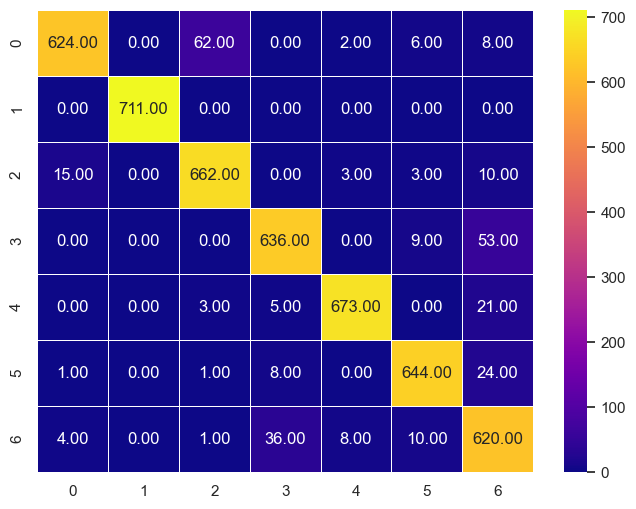

Model: Decision Tree Classifier
Accuracy: 0.9247378161628624
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       702
           1       1.00      1.00      1.00       711
           2       0.93      0.91      0.92       693
           3       0.89      0.88      0.88       698
           4       0.97      0.95      0.96       702
           5       0.94      0.95      0.95       678
           6       0.83      0.85      0.84       679

    accuracy                           0.92      4863
   macro avg       0.92      0.92      0.92      4863
weighted avg       0.93      0.92      0.92      4863



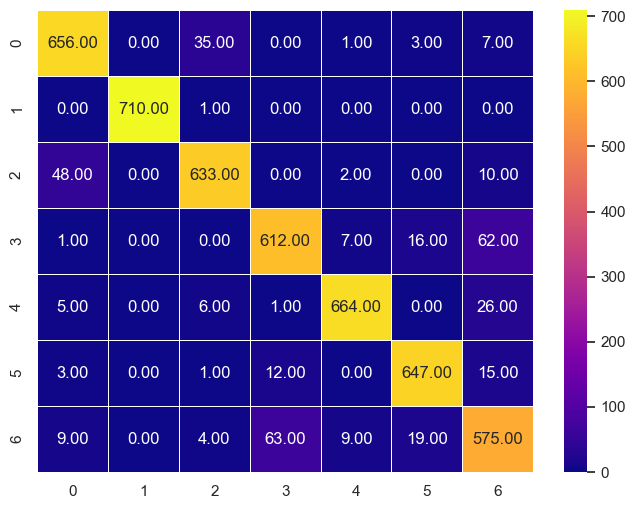

Model: Random Forest Classifier
Accuracy: 0.9498252107752416
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       702
           1       1.00      1.00      1.00       711
           2       0.95      0.96      0.95       693
           3       0.92      0.91      0.92       698
           4       0.98      0.97      0.97       702
           5       0.96      0.97      0.96       678
           6       0.87      0.91      0.89       679

    accuracy                           0.95      4863
   macro avg       0.95      0.95      0.95      4863
weighted avg       0.95      0.95      0.95      4863



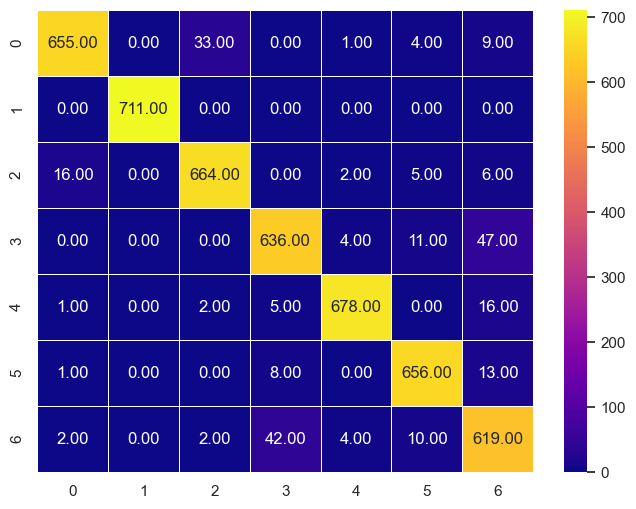

Model: Gradient Boosting Classifier
Accuracy: 0.9397491260538762
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       702
           1       1.00      1.00      1.00       711
           2       0.92      0.94      0.93       693
           3       0.92      0.92      0.92       698
           4       0.98      0.96      0.97       702
           5       0.96      0.95      0.96       678
           6       0.85      0.90      0.88       679

    accuracy                           0.94      4863
   macro avg       0.94      0.94      0.94      4863
weighted avg       0.94      0.94      0.94      4863



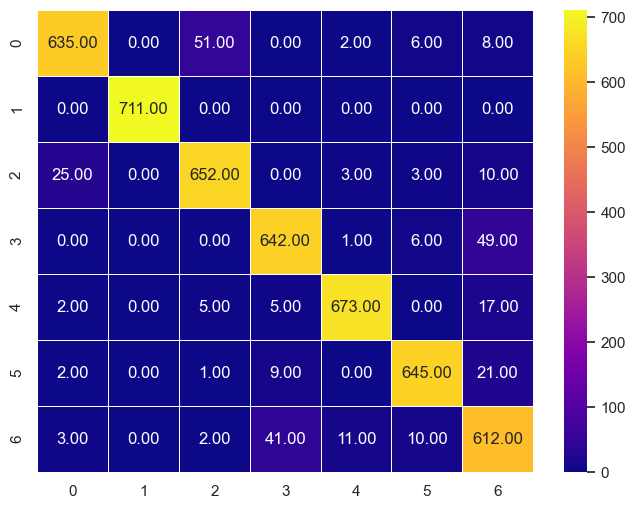

Model: Gaussian Naive Bayes
Accuracy: 0.9105490438001234
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       702
           1       1.00      1.00      1.00       711
           2       0.84      0.90      0.87       693
           3       0.93      0.86      0.89       698
           4       0.97      0.95      0.96       702
           5       0.95      0.96      0.95       678
           6       0.79      0.92      0.85       679

    accuracy                           0.91      4863
   macro avg       0.91      0.91      0.91      4863
weighted avg       0.91      0.91      0.91      4863



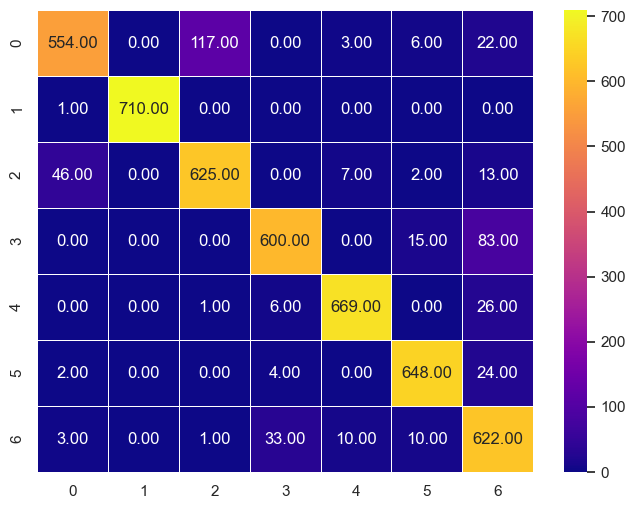

Model: K-Nearest Neighbors
Accuracy: 0.9405716635821509
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       702
           1       1.00      1.00      1.00       711
           2       0.94      0.94      0.94       693
           3       0.91      0.88      0.90       698
           4       0.98      0.97      0.97       702
           5       0.95      0.97      0.96       678
           6       0.85      0.90      0.87       679

    accuracy                           0.94      4863
   macro avg       0.94      0.94      0.94      4863
weighted avg       0.94      0.94      0.94      4863



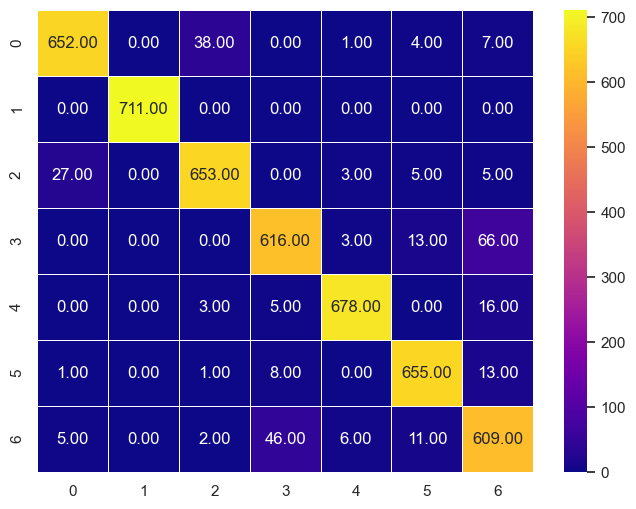

In [52]:
for model_name, model in models.items():
  # predict on test data
  y_pred = model.predict(x_test_scaled)
  test_accuracy = model.score(x_test_scaled, y_test)
  test_accuracies.append(test_accuracy)

  print(f"Model: {model_name}")
  print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
  con = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(con, annot=True, fmt=".2f", cmap='plasma', linewidths=0.5)
  plt.show()

### Insights:

* **The Support Vector Classifier (SVC)** and **Random Forest Classifie**r demonstrated the highest accuracy, both around **94-95%**, showcasing strong predictive capabilities.

* **The Decision Tree Classifier** showed lower accuracy at **92%,** which, while decent, might benefit from further hyperparameter tuning or the exploration of alternative approaches.

* **The Gradient Boosting Classifier** performed similarly to the SVC and Random Forest at**94%,** indicating robust performance with a need for optimization.

* **The Gaussian Naive Bayes** model achieved an accuracy of about **91%,** showing solid performance but may require additional improvements for specific classes like SIRA.

* **The K-Nearest Neighbors (KNN)** model performed well with an accuracy of approximately **94%,** making it a strong contender for further evaluation and fine-tuning.

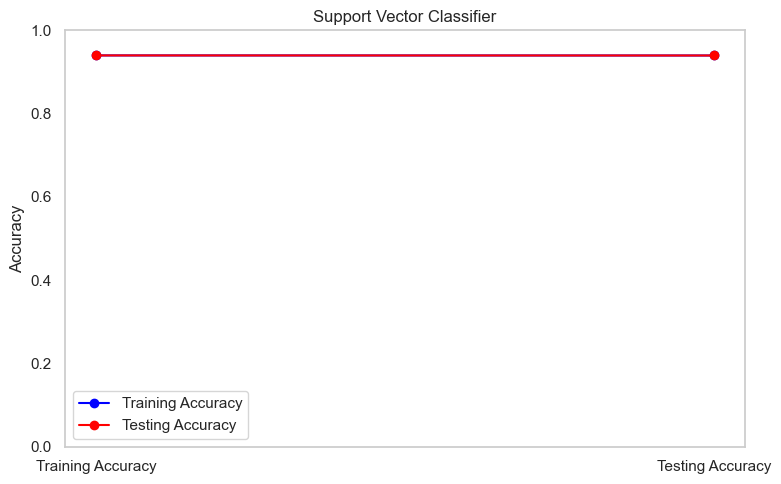

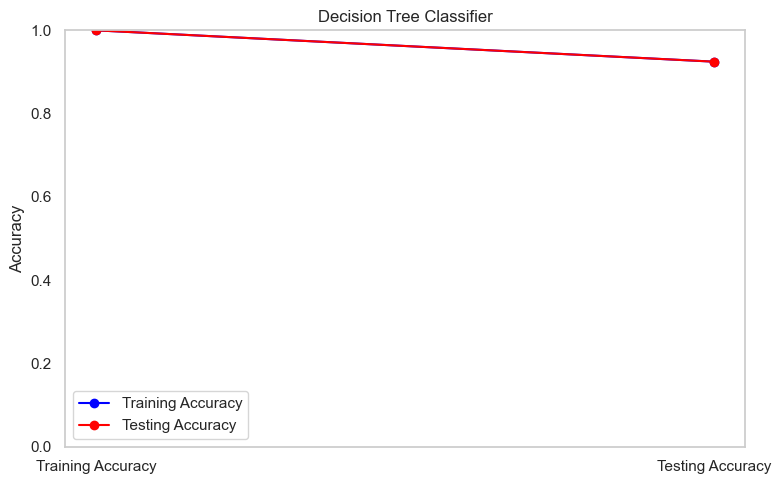

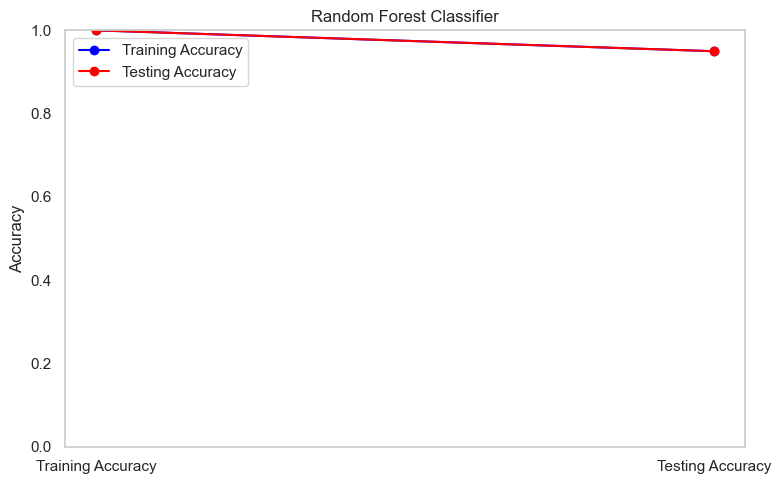

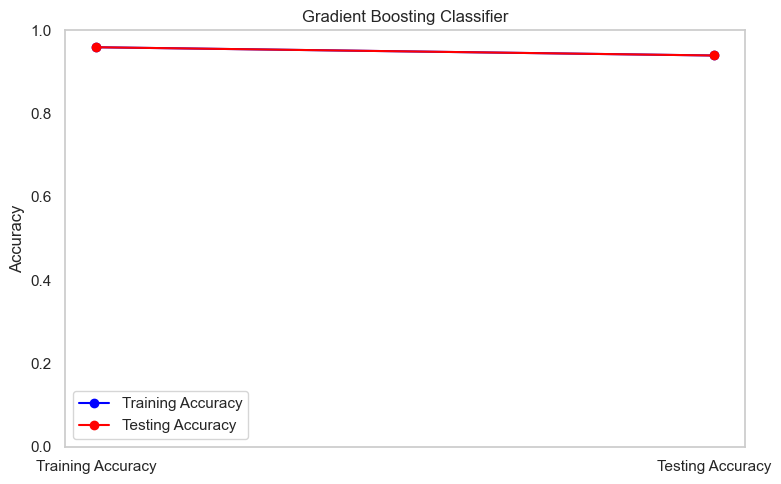

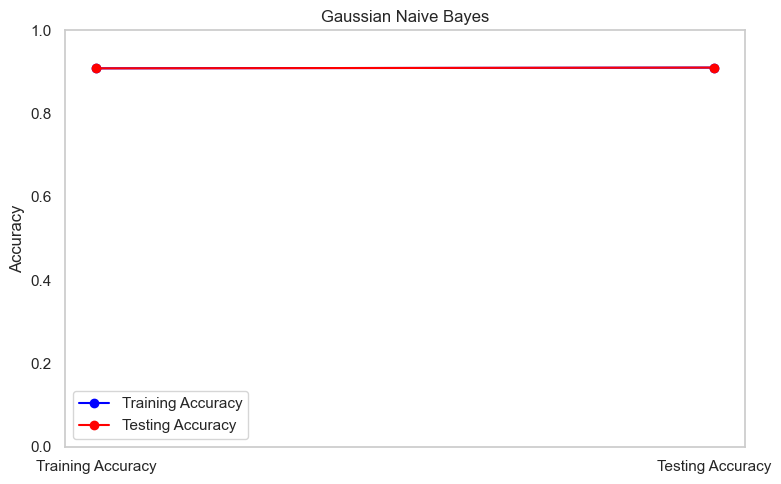

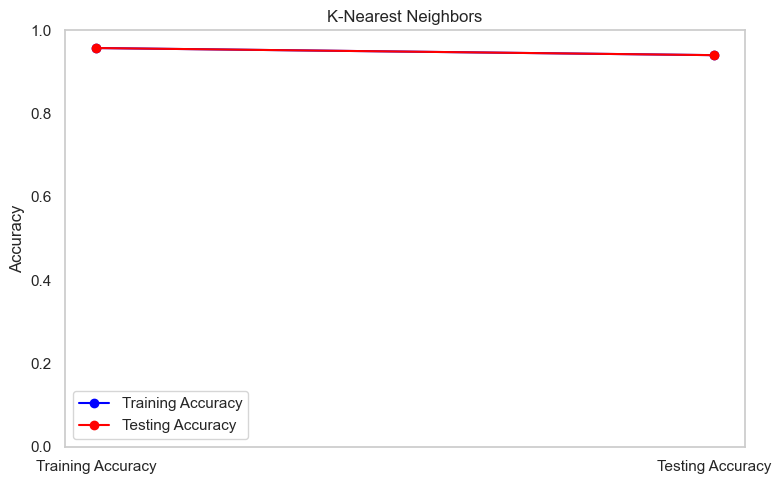

In [53]:
# Create a DataFrame for visualization
accuracy_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Training Accuracy': train_accuracies,
    'Testing Accuracy': test_accuracies
})



# Create individual plots for each model's training and testing accuracy
for i, model_name in enumerate(models.keys()):
    plt.figure(figsize=(8, 5))

    # Plotting training accuracy in blue and testing accuracy in orange
    plt.plot(['Training Accuracy', 'Testing Accuracy'],
             [train_accuracies[i], test_accuracies[i]],
             marker='o', color='blue', label='Training Accuracy')

    # Adding a second line for testing accuracy
    plt.plot(['Training Accuracy', 'Testing Accuracy'],
             [train_accuracies[i], test_accuracies[i]],
             marker='o', color='red', label='Testing Accuracy')

    # Adding labels and title for each plot
    plt.title(model_name)
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Set the y-axis limits to show accuracy percentage clearly
    plt.grid()
    plt.legend()

    # Show plot for each model
    plt.tight_layout()
    plt.show()

_____________
## Insights:

**1) Support Vector Classifier (SVC): 93.97%**

* The SVC shows strong generalization ability with high testing accuracy, suggesting it performs well on unseen data without overfitting.

**2) Decision Tree Classifier: 92.58%**

* Despite perfect training accuracy, the decision tree shows a noticeable drop in testing accuracy, which may indicate overfitting to the training data and a need for better generalization.

**3) Random Forest Classifier: 95.02%**

* Random Forest achieves the highest testing accuracy, showing excellent generalization and strong predictive power on unseen data.

**4) Gradient Boosting Classifier: 93.97%**

* The Gradient Boosting model performs well with testing accuracy close to that of the SVC, suggesting good generalization and solid performance on new data.

**5) Gaussian Naive Bayes: 91.06%**

* Naive Bayes shows relatively lower testing accuracy compared to the other models, but it still generalizes decently, making it a useful baseline model.

**6)K-Nearest Neighbors (KNN): 94.06%**

* KNN performs well with high testing accuracy, showing strong generalization and minimal overfitting.

    * In summary, Random Forest has the highest testing accuracy, while Naive Bayes performs the least well. The other models show a good balance between training and testing accuracy, indicating their ability to generalize effectively to unseen data.
_________

_______
# 13. **Hyperparameter Tuning:**
_______

In [54]:
best_accuracy = 0
best_model = 0
# Define hyperparameter grids for each model
param_grids = {
    
    'Support Vector Classifier': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Decision Tree Classifier': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest Classifier': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting Classifier': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'Gaussian Naive Bayes': {},
        'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# Train and tune each model using Grid Search
for model_name in param_grids.keys():
    if model_name == 'Gaussian Naive Bayes':
        model = GaussianNB()
    elif model_name == 'Support Vector Classifier':
        model = SVC()
    elif model_name == 'Decision Tree Classifier':
        model = DecisionTreeClassifier()
    elif model_name == 'Random Forest Classifier':
        model = RandomForestClassifier()
    elif model_name == 'Gradient Boosting Classifier':
        model = GradientBoostingClassifier()
    elif model_name == 'K-Nearest Neighbors':
        model = KNeighborsClassifier()
    else:
        # Initialize the appropriate classifier based on the name
        model_class = eval(model_name.replace(" ", ""))
        model = model_class()

    # Set up GridSearchCV with cross-validation
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5)

    # Fit the model on training data
    grid_search.fit(x_train_scaled, y_train)

    # Predict on test data using the best estimator
    y_pred = grid_search.best_estimator_.predict(x_test_scaled)

    # Calculate accuracy on test data
    test_accuracy = grid_search.score(x_test_scaled, y_test)

    # Print results
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Check if this is the best model so far
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = grid_search.best_estimator_

print(f"Best Model: {best_model.__class__.__name__}")
print(f"Best Accuracy: {best_accuracy}")

Model: Support Vector Classifier
Best Parameters: {'C': 10, 'kernel': 'linear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       702
           1       1.00      1.00      1.00       711
           2       0.92      0.94      0.93       693
           3       0.93      0.91      0.92       698
           4       0.97      0.96      0.97       702
           5       0.95      0.95      0.95       678
           6       0.86      0.91      0.88       679

    accuracy                           0.94      4863
   macro avg       0.94      0.94      0.94      4863
weighted avg       0.94      0.94      0.94      4863

Model: Decision Tree Classifier
Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       702
           1       1.00      1.00      1.00       711
           2       0.92

___________
## Insights:

**1) Support Vector Classifier:**

* Best Parameters: {'C': 10, 'kernel': 'linear'}
* Accuracy: 94%
* The model performs well across most categories, with high precision, recall, and F1 scores. It particularly excels in the Bombay class, achieving perfect scores.

**2) Decision Tree Classifier:**

* Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
* Accuracy: 93%
* It achieves a slightly lower accuracy compared to SVC, but still performs very well. The Sira class has relatively lower scores, suggesting that the model might benefit from further tuning or more features.

**3)Random Forest Classifier:**

* Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
* Accuracy: 95%
* This model stands out with the highest accuracy, showing strong overall performance, especially in classes like Horoz, which have very high precision and recall.

**4) Gradient Boosting Classifier:**

* Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
* Accuracy: 94%
* The model provides balanced performance but doesn't quite match the Random Forest in terms of overall accuracy, especially for classes like Sira.

**5) Gaussian Naive Bayes:**

* Best Parameters: No hyperparameter tuning was performed.
* Accuracy: 91%
* While it performs decently, its accuracy is lower compared to other models. The recall for the Barbunya class is particularly low, indicating room for improvement.

**6) K-Nearest Neighbors:**

* Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
* Accuracy: 94%
* This model performs well overall, with balanced results across all classes. Like the other models, it achieves high performance for Bombay, Horoz, and Seeker classes.

* **Conclusion:**

    The hyperparameter tuning process has led to some improved performance for several models, particularly the Random Forest Classifier, which achieved the highest accuracies (95% ). The KNN & Gradient Boosting Classifier also performed well, while models like the Decision Tree and Gaussian Naive Bayes still require further optimization to enhance their predictive capabilities.
_______________

#### Best model:

In [55]:
print(f"Best Model: {best_model.__class__.__name__}")
print(f"Best Accuracy: {best_accuracy}")

Best Model: RandomForestClassifier
Best Accuracy: 0.950236479539379


__________
# Pipeline
__________

In [56]:
from sklearn.impute import SimpleImputer
#Creating Pipeline
pipeline=Pipeline([
    ('Imputer',SimpleImputer(strategy='mean')),
    ('Scaler',StandardScaler()),
    ('Model',RandomForestClassifier())
])

In [57]:
pipeline.fit(x_train_scaled,y_train)

Pipeline(steps=[('Imputer', SimpleImputer()), ('Scaler', StandardScaler()),
                ('Model', RandomForestClassifier())])

In [58]:
y_pred=pipeline.predict(x_test_scaled)
y_pred

array([5, 0, 1, ..., 2, 6, 3])

In [59]:
X_train.columns

Index(['MajorAxisLength', 'ShapeFactor3', 'Compactness', 'roundness',
       'ShapeFactor1', 'ShapeFactor2', 'Eccentricity', 'Area', 'ConvexArea',
       'MinorAxisLength', 'AspectRation', 'Solidity', 'EquivDiameter'],
      dtype='object')

________
# 14. **Save the Model:**
__________

In [60]:
import joblib

joblib.dump(pipeline, "Best_Model.pkl")
print("Pipeline successfully saved best model as'Best_Model.pkl'")

# Printing the best model's name and accuracy
print(f"The best model is: {best_model.__class__.__name__}")
print(f"The best model's accuracy is: {best_accuracy:.2f}")

Pipeline successfully saved best model as'Best_Model.pkl'
The best model is: RandomForestClassifier
The best model's accuracy is: 0.95


### Model Performance

* Model Type: Random Forest Classifier

* Accuracy: 95%

* Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}

* The Random Forest Classifier model achieved an impressive accuracy of 95%, demonstrating its effectiveness in classifying dry bean types based on their features. The model excels at accurately distinguishing between different bean varieties, including both more distinct and similar classes.

________
# 15. **Test with Unseen Data:**
_______

In [61]:
import pandas as pd

# Load the uploaded Excel file to inspect its contents
file_path = r"C:\Users\admin\Downloads\dry+bean+dataset\DryBeanDataset\Dry_Bean_Dataset.xlsx"
data = pd.ExcelFile(file_path)

In [62]:
# Load the 'Dry_Beans_Dataset' sheet
df = data.parse('Dry_Beans_Dataset')

# Display the first few rows to understand its structure
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [63]:
# Randomly sample 20 rows from the dataset
unseen_data = df.sample(n=20, random_state=42)

# Display the unseen data
unseen_data

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
1488    42339    741.226       260.199331       207.306394      1.255144   
2611    68247   1088.754       370.368146       237.863792      1.557060   
749     37856    708.716       248.430330       194.360324      1.278195   
99      33143    648.385       222.526310       189.737379      1.172812   
11298   29925    647.570       237.714031       161.004848      1.476440   
868     38489    707.978       244.119399       200.950084      1.214826   
5382    89592   1155.357       452.291405       254.964533      1.773939   
1491    42379    759.965       251.037567       215.217912      1.166434   
3813   203536   1735.247       648.157318       401.698875      1.613540   
10659   27306    608.784       225.492411       154.595717      1.458594   
12210   33380    667.768       246.937845       172.400559      1.432349   
9419    47884    832.392       322.795376       189.690653      1.701694   
13549   41451    757.604       282.674852       187.293892      1.509258   
6452    53684    902.240       364.958131       189.896292      1.921881   
10287   25148    585.498       207.373269       155.484235      1.333725   
3635   174621   1591.312       590.554867       379.993760      1.554117   
12216   33409    679.539       248.877464       171.379959      1.452197   
9055    45954    795.062       294.820672       199.020609      1.481358   
2615    68309   1097.068       381.575080       229.151760      1.665163   
10086   21961    551.696       204.776313       136.709958      1.497889   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
1488       0.604347       42676     232.180294  0.771202  0.992103   0.968387   
2611       0.766507       70172     294.779204  0.767683  0.972567   0.723492   
749        0.622835       38232     219.544429  0.744640  0.990165   0.947109   
99         0.522480       33377     205.423899  0.769980  0.992989   0.990685   
11298      0.735703       30321     195.196551  0.785309  0.986940   0.896748   
868        0.567805       38782     221.372349  0.788871  0.992445   0.964955   
5382       0.825968       90627     337.745581  0.795772  0.988580   0.843425   
1491       0.514795       42840     232.289945  0.763586  0.989239   0.922090   
3813       0.784795      206049     509.067858  0.774879  0.987804   0.849432   
10659      0.727986       27648     186.459323  0.801491  0.987630   0.925852   
12210      0.715948       33734     206.157066  0.795368  0.989506   0.940687   
9419       0.809115       48343     246.916590  0.753391  0.990505   0.868449   
13549      0.748994       41897     229.732567  0.718637  0.989355   0.907529   
6452       0.853969       54390     261.443286  0.663749  0.987020   0.828725   
10287      0.661688       25433     178.939733  0.714432  0.988794   0.921855   
3635       0.765486      177034     471.523449  0.766366  0.986370   0.866554   
12216      0.725130       33850     206.246600  0.710029  0.986972   0.909169   
9055       0.737766       46398     241.889334  0.780296  0.990431   0.913548   
2615       0.799593       69725     294.913072  0.700088  0.979692   0.713215   
10086      0.744514       22267     167.217265  0.780419  0.986258   0.906697   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
1488      0.892317      0.006146      0.002403      0.796230      0.999383   
2611      0.795909      0.005427      0.001343      0.633471      0.986352   
749       0.883726      0.006563      0.002469      0.780972      0.998235   
99        0.923144      0.006714      0.003008      0.852195      0.999465   
11298     0.821140      0.007944      0.002228      0.674271      0.995521   
868       0.906820      0.006343      0.002646      0.822322      0.998979   
5382      0.746743      0.005048      0.000968      0.557626      0.989193   
1491      0.925319      0.005924      0.002679      0.856216      0.998720   
3813    

In [64]:
unseen_data.shape

(20, 17)

In [65]:
unseen_data = unseen_data.drop(columns=['Class'])

In [66]:
unseen_data.shape

(20, 16)

In [67]:
# 1. Check for missing values
print("\nMissing Values:")
print(unseen_data.isnull().sum())


Missing Values:
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64


In [68]:
unseen_data.duplicated().sum()

0

In [69]:
num_data = unseen_data.select_dtypes(include='number')
numeric_columns=list(num_data)
numeric_columns

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4']

In [70]:
# 1. Check for skewness
skewness = unseen_data.select_dtypes(include='number').skew()
print("\nSkewness of each feature:")
print(skewness)


Skewness of each feature:
Area               2.383456
Perimeter          1.717205
MajorAxisLength    1.699743
MinorAxisLength    1.995326
AspectRation       0.288299
Eccentricity      -0.783579
ConvexArea         2.375614
EquivDiameter      1.926694
Extent            -1.087450
Solidity          -2.211128
roundness         -1.269390
Compactness        0.149206
ShapeFactor1      -0.543621
ShapeFactor2      -0.327986
ShapeFactor3       0.291123
ShapeFactor4      -1.224422
dtype: float64


In [71]:
# Define features for which you want to remove outliers
features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 
            'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

for feature in features:
    # Calculate Q1, Q3, and IQR
    Q1 = unseen_data[feature].quantile(0.25)
    Q3 = unseen_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 0.5 * IQR
    upper = Q3 + 0.5 * IQR
    
    # Filter data to remove outliers for the current feature
    unseen_data_cleaned = unseen_data[(unseen_data[feature] >= lower) & (unseen_data[feature] <= upper)]

In [72]:
unseen_data_cleaned.shape

(16, 16)

In [73]:
skewness = unseen_data_cleaned.select_dtypes(include='number').skew()
print("\nSkewness of each feature:")
print(skewness)


Skewness of each feature:
Area               3.581182
Perimeter          2.881477
MajorAxisLength    2.974499
MinorAxisLength    2.888525
AspectRation      -0.018836
Eccentricity      -0.698986
ConvexArea         3.576546
EquivDiameter      3.065622
Extent            -0.682243
Solidity          -1.506477
roundness         -2.038056
Compactness        0.289758
ShapeFactor1      -0.781690
ShapeFactor2      -0.945309
ShapeFactor3       0.374625
ShapeFactor4      -0.707914
dtype: float64


In [74]:
# Highlight the features with high skewness (greater than 0.5 or less than -0.5)
highly_skewed = skewness[(skewness > 0.5) | (skewness < -0.5)]
print("\nHighly skewed features:")
print(highly_skewed)
print(len(highly_skewed))


Highly skewed features:
Area               3.581182
Perimeter          2.881477
MajorAxisLength    2.974499
MinorAxisLength    2.888525
Eccentricity      -0.698986
ConvexArea         3.576546
EquivDiameter      3.065622
Extent            -0.682243
Solidity          -1.506477
roundness         -2.038056
ShapeFactor1      -0.781690
ShapeFactor2      -0.945309
ShapeFactor4      -0.707914
dtype: float64
13


In [75]:
from scipy import stats

# Copy the cleaned DataFrame to preserve the original
unseen_transformed = unseen_data_cleaned.copy()

# List of features to transform
highly_skewed_features = [
    'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea',
    'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor4'
]

# Handle non-positive values and apply Box-Cox transformation
skewness_after_transformation = {}
for feature in highly_skewed_features:
    # Ensure all values are strictly positive
    if (unseen_transformed[feature] <= 0).any():
        unseen_transformed[feature] += abs(unseen_transformed[feature].min()) + 1
    
    # Apply Box-Cox transformation
    unseen_transformed[feature], _ = stats.boxcox(unseen_transformed[feature])
    
    # Compute skewness after transformation
    skewness_after_transformation[feature] = unseen_transformed[feature].skew()

# Display skewness values after transformation
for feature, skewness in skewness_after_transformation.items():
    print(f"Skewness of {feature} after Box-Cox transformation: {skewness:.4f}")

Skewness of Area after Box-Cox transformation: 0.0000
Skewness of Perimeter after Box-Cox transformation: 0.0000
Skewness of MajorAxisLength after Box-Cox transformation: 0.0000
Skewness of MinorAxisLength after Box-Cox transformation: 0.0000
Skewness of AspectRation after Box-Cox transformation: -0.0394
Skewness of Eccentricity after Box-Cox transformation: -0.2443
Skewness of ConvexArea after Box-Cox transformation: 0.0000
Skewness of EquivDiameter after Box-Cox transformation: 0.0000
Skewness of Extent after Box-Cox transformation: -0.2123
Skewness of Solidity after Box-Cox transformation: -0.0199
Skewness of roundness after Box-Cox transformation: -0.0356
Skewness of ShapeFactor1 after Box-Cox transformation: 0.0000
Skewness of ShapeFactor4 after Box-Cox transformation: -0.1551


In [76]:
unseen_transformed.drop(columns=['ShapeFactor4', 'Perimeter','Extent'],axis=1,inplace=True)

In [77]:
scaler = StandardScaler()
unseen_data_scaled = scaler.fit_transform(unseen_transformed)


# Convert back to DataFrame for consistency
unseen_data_scaled = pd.DataFrame(unseen_data_scaled, columns=unseen_transformed.columns)

In [78]:
# Load the best model from a file
model_filename = 'best_model.joblib'
loaded_pipeline = joblib.load(model_filename)

In [79]:
# Make predictions on unseen data
predictions = loaded_pipeline.predict(unseen_data_scaled)

# Output predictions
print("Predictions on Unseen Data:", predictions)
     

Predictions on Unseen Data: [1 0 1 6 0 1 3 6 6 6 6 2 6 6 3 4]


In [80]:
# Convert numeric predictions to original class names (if needed)
class_predictions = label_encoder.inverse_transform(predictions)

# Output the class predictions
print("Predictions on Unseen Data:", class_predictions)

Predictions on Unseen Data: ['BOMBAY' 'BARBUNYA' 'BOMBAY' 'SIRA' 'BARBUNYA' 'BOMBAY' 'DERMASON' 'SIRA'
 'SIRA' 'SIRA' 'SIRA' 'CALI' 'SIRA' 'SIRA' 'DERMASON' 'HOROZ']


___________
# 16. **Interpretation of Results (Conclusion):**
___________

* The Random Forest Classifier model achieved the highest accuracy of 0.95, demonstrating strong performance in classifying dry bean based on their browsing behavior. This suggests that Random Forest Classifier effectively identifies the classifications..
* The model's predictions on unseen data include classes such as 'BARBUNYA', 'BOMBAY', 'SIRA', 'CALI', 'SEKER', 'HOROZ" and 'DERMASON', which reflects its ability to generalize well to new examples.
* However, the dataset may have some limitations, such as potential data imbalances or missing values, which could affect the model's overall performance. Additionally, feature selection and data preprocessing steps may require further refinement to improve model accuracy in future iterations.

__________
# 17. **Future Work:**
________

* **Deep Learning Exploration:** Investigate deep learning algorithms, such as neural networks, for potentially higher accuracy and capturing more complex patterns in the data.
* **Model Updates**: Periodically update the model with new data to ensure it adapts to changing trends and behaviors over time.
* **Imbalanced Data Handling:** Implement resampling techniques, like oversampling or undersampling, to address any class imbalances in the dataset, ensuring the model is not biased.
* **Feature Engineering:** Consider adding more features or engineering existing ones to capture more nuanced patterns that could enhance the model's predictive power.
  
**Best Model: The Random Forest Classifier model, with an accuracy of 0.95, has been saved as best_model.joblib for future use.**

______________
----------------------------------------------------- THE END ---------------------------------------------------------------------
__________